<a href="https://colab.research.google.com/github/b4urock/Brazil-Students-Sex-Abuse-Data-Analysis/blob/main/Projeto_M%C3%B3dulo_03_An%C3%A1lise_pense_2015_amostra2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

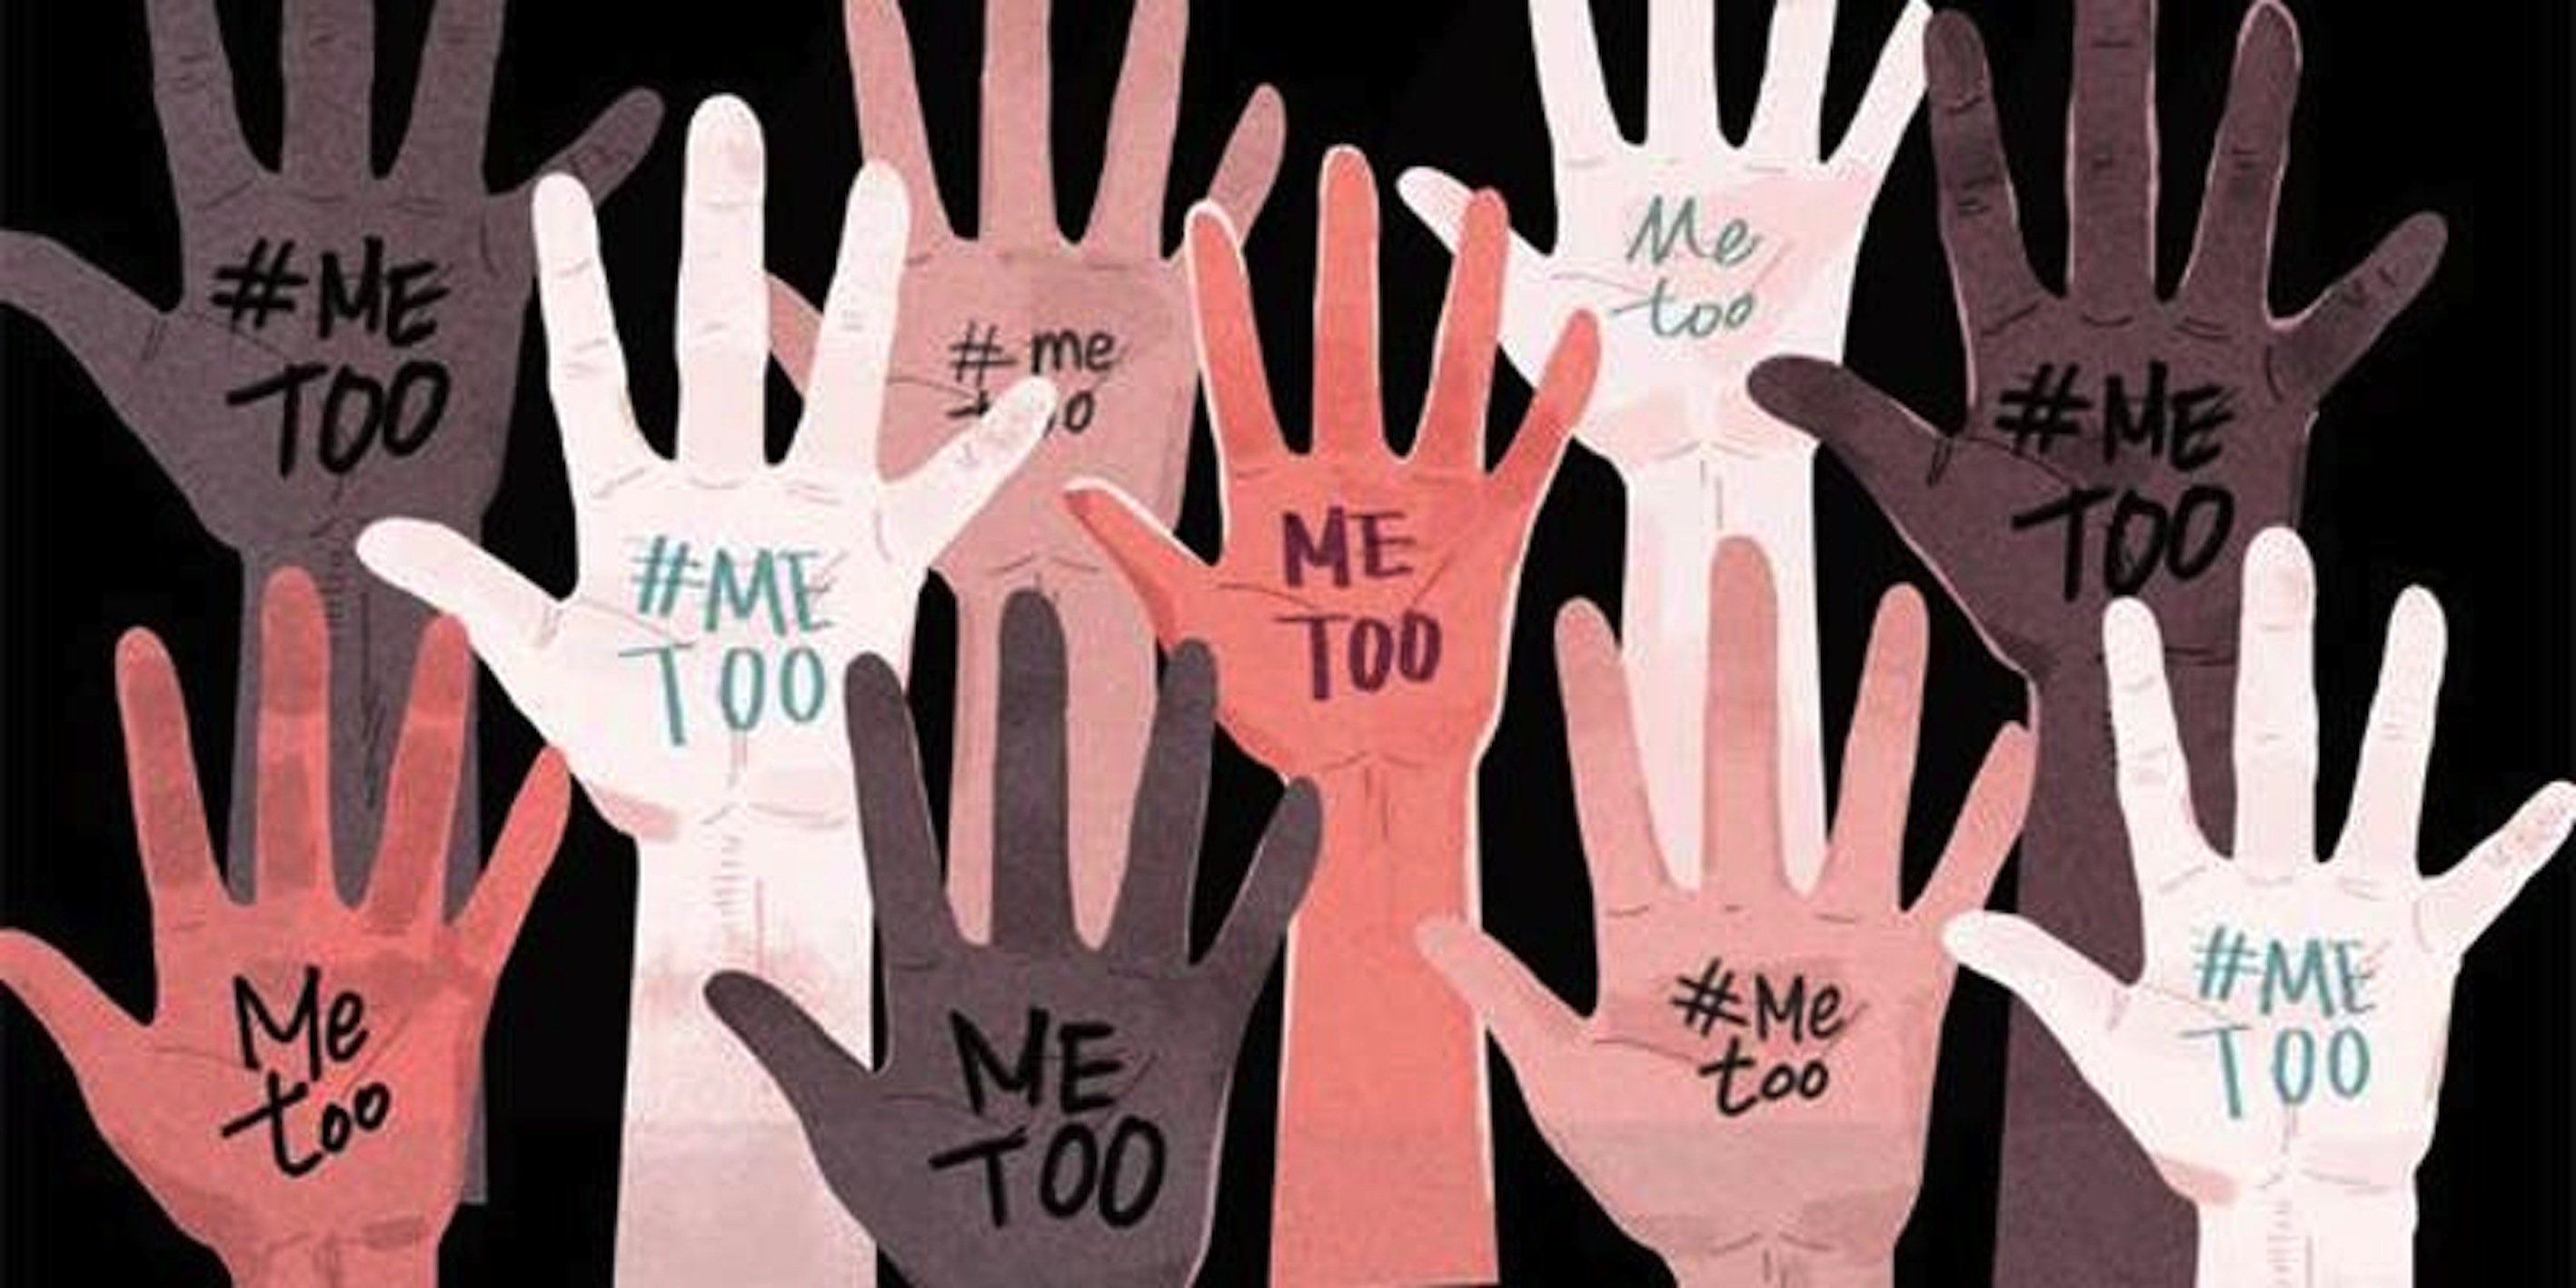[Movimento #MeToo](https://pt.wikipedia.org/wiki/Movimento_Me_Too)

# **Análise de hipóteses quanto as consequências do abuso sexual sofrido por estudantes participantes da pesquisa IBGE PeNSE - 2015**

Autor: Pablo Pereira
* [Linkedln](https://www.linkedin.com/in/pablo-pereira-3107/)
* [Github](https://github.com/b4urock)

## Objetivo

O objetivo principal desta análise é verificar o impacto na vida de estudantes que foram forçados a praticar sexo por pessoas - que podem ou não - ser de seu convívio social. 

Utilizei os dados da Pesquisa [PeNSE Amostra 2](https://www.ibge.gov.br/estatisticas/sociais/educacao/9134-pesquisa-nacional-de-saude-do-escolar.html?=&t=o-que-e) que inclui, em seus levantamentos, várias informações sobre a saúde física e mental dos estudantes. Escolhi a [Amostra 2](https://www.ibge.gov.br/estatisticas/downloads-estatisticas.html?caminho=pense/2015/microdados/) pois esta contém dados dos estudantes de 13 à 17 anos de idade frequentando as etapas do 6º ao 9º ano do ensino fundamental (antigas 5ª a 8ª séries) e da 1ª a 3ª série do ensino médio. A Amostra 1 trata apenas escolares frequentando o 9º ano do ensino fundamental por isso optei por não utilizá-la.

A última pesquisa realizada foi em 2015 e, portanto, estes são os dados mais atuais disponíveis

O impacto do sexo forçado será mensurado comparando as respostas de vários indicadores dentro da própria pesquisa PeNSE 2015. Como referência e no final desta análise, será também realizada uma comparação com uma pesquisa similar, publicada em 2015, e realizada pelo *Instituto de Investigaciones en Ciencias de la Salud-Universidad Nacional de Asunción (IICS-UNA), Paraguay* em conjunto com o *Centro para el Desarrollo de la Investigación Científica CEDIC/Díaz Gill, Paraguay* **(UNA-2015)** 



## O que é a pesquisa PeNSE?

A **PeNSE** (Pesquisa Nacional de Saúde Escolhar) investiga informações que permitem conhecer e dimensionar os fatores de risco e proteção à saúde dos adolescentes. A pesquisa é realizada por amostragem e de **forma anônima, auto-administrada e coletada via dispositivo eletrônico - vide vídeo abaixo**, utilizando como referência para seleção o cadastro das escolas públicas e privadas do Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira - INEP. No site do [IBGE](https://www.ibge.gov.br/estatisticas/sociais/educacao/9134-pesquisa-nacional-de-saude-do-escolar.html?=&t=o-que-e) é possível encontrar informações detalhadas sobre a pesquisa, periodicidade e amostragens.

No vídeo institucional, abaixo do próprio IBGE, há um resumo das aplicações da PeNSE.


In [87]:
from IPython.display import HTML
HTML('<iframe width="853" height="480" src="https://www.youtube.com/embed/z4BBCHZUvD4" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

## Resumo da análise

Pontos encontrados através da análise da base **PeNSE 2015 - Amostra 2**:

* 34 estudantes foram forçados a praticar sexo por mais de uma pessoa.

* Da base de dados PeNSE 2015 um total de **569** estudantes  responderam **Sim**, para pelo menos uma das perguntas analisadas, sobre abuso sexual

* População total da pesquisa PeNSE 2015 Amostra 2 é**16.556** estudantes

* Percentual desta população total que sofreram abusos: **3.44%**

* Os estudantes da raça/cor parda são os que mais sofrem abusos sexuais

* Nota-se um proporção maior de estudantes que consideram a imagem corporal **muito importante** na amostra de estudantes que sofreram abuso sexual.

* Mulheres sofrem mais abusos sexuais.

* Nota-se que o maior número de casos de abuso sexual ocorre por volta dos **16 anos para as mulheres e 14 anos para os homens**, onde para ambos o período de maior frequência se situa na faixa de idade entre 13 à 16 anos de idade

* Observei que as mulheres também possuem maior número de abusadores múltiplos do que os homens. Elas ainda sofrem mais abusos dos Namorado(a) e Amigo(a)s

* Nota-se que, na amostra de estudantes do sexo masculino, há um maior número de casos onde o estudante é forçado a realizar sexo com amigo(a) aos 13 anos de idade e namorado(a) aos 15 anos de idade.

* Os estudantes que sofreram abuso sexual tiveram contato mais cedo com drogas - por volta dos **13 anos** - do que os estudantes que não foram vítimas de abuso.

* Percentualmente o consumo de drogas é bem superior nos últimos 30 dias, em todas as faixas de dias apurados, para estudantes que sofreram abuso sexual.

* Há uma maior frequência, no **primeiro contato com bebida alcoólica (13 anos)**, em estudantes que sofreram abuso sexual. Para os estudantes que não sofreram esta violência, a maior frequência para o primeiro contato com bebida alcoólica é aos 14 anos de idade.

* Proporcionalmente há uma maior frequência de consumo de bebidas acoólicas, nos últimos 30 dias, em estudantes que sofreram abusos sexuais.

* Estudantes que sofreram abuso sexual tiveram contato com cigarro mais cedo e com maior frequência de incidência, em todas as faixa etárias da amostra analisada, do que estudantes que não sofreram abusos sexuais.

* Proporcionalmente, a amostra de estudantes que sofreu abuso sexual tem maior frequência de consumo de cigarros, nos últimos 30 dias, em todos os intervalos de tempo disponíveis na pesquisa, que a amostra de estudantes que não sofreu abuso sexual.

* Em termos proporcionais, a amostra de estudantes que sofreu bullying possuiu margem um pouco maior, em todos os níveis de frequência, que a amostra que não sofreu abuso sexual.

* Na a amostra analisada, o número maior de abusos sexuais é cometido pelo(a) **Namorado(a)** e em segunda posição por **membros da própria família**.

Comparando os dados coletados de pesquisa similar realizada pelo *Instituto de Investigaciones en Ciencias de la Salud-Universidad Nacional de Asunción (IICS-UNA), Paraguay* em conjunto com o *Centro para el Desarrollo de la Investigación Científica CEDIC/Díaz Gill, Paraguay* **(UNA-2015)**, com o resultado da análise de dados da pesquisa **PeNSE 2015**, também verifiquei:

* Homogeneidade dos gêneros é muito próxima entre as pesquisas

 * UNA - 2015 
    * Total de indivíduos do sexo masculino	318 (48.1%)
    * Total de indivíduos do sexo femino	343 (51.9%)

 * PeNSE - 2015
    * Total de indivíduos do sexo masculino	8287 (50.1%)
    * Total de indivíduos do sexo feminino	8269 (49.9%)

* A faixa etária de maior volume e percentual de abusos sexuais é muito similar em ambas.

 * UNA - 2015 
    * Faixa de etária com maior incidência do abuso	10-15 anos
    * Percentual (em relação ao total de abusados) da faixa etária com maior incidência de abuso	45.1%

 * PeNSE - 2015
    * Faixa de etária com maior incidência do abuso	13-16 anos
    * Percentual (em relação ao total de abusados) da faixa etária com maior incidência de abuso	44.6%

* A classe de abusador de maior incidência é a mesma **"Familiar ou Próximo da Família"**



## Referências Bibliográficas:

[Arrom C, Ruoti M, Orué E, Arrom CM. Abuso sexual y otras formas de violencia en estudiantes de nivel medio en el departamento de Alto Paraná. Mem. Inst. Investig. Cienc. Salud. 2015;13(3):31-38](http://scielo.iics.una.py//scielo.php?script=sci_arttext&pid=S1812-95282015000300006&lang=pt)


# Navegação

As diferentes seções e **hipóteses** desta análise podem ser encontradas na barra de índice lateral no canto superior esquerdo - identificado como: image.png

Os gráficos interativos e clicáveis - quando identificados - podem fornecer uma visão mais detalhada dos dados e seções analisadas, como pode-se verificar no exemplo abaixo com o detalhamento por Idade e Sexo (do abusado) das classes de abusadores.

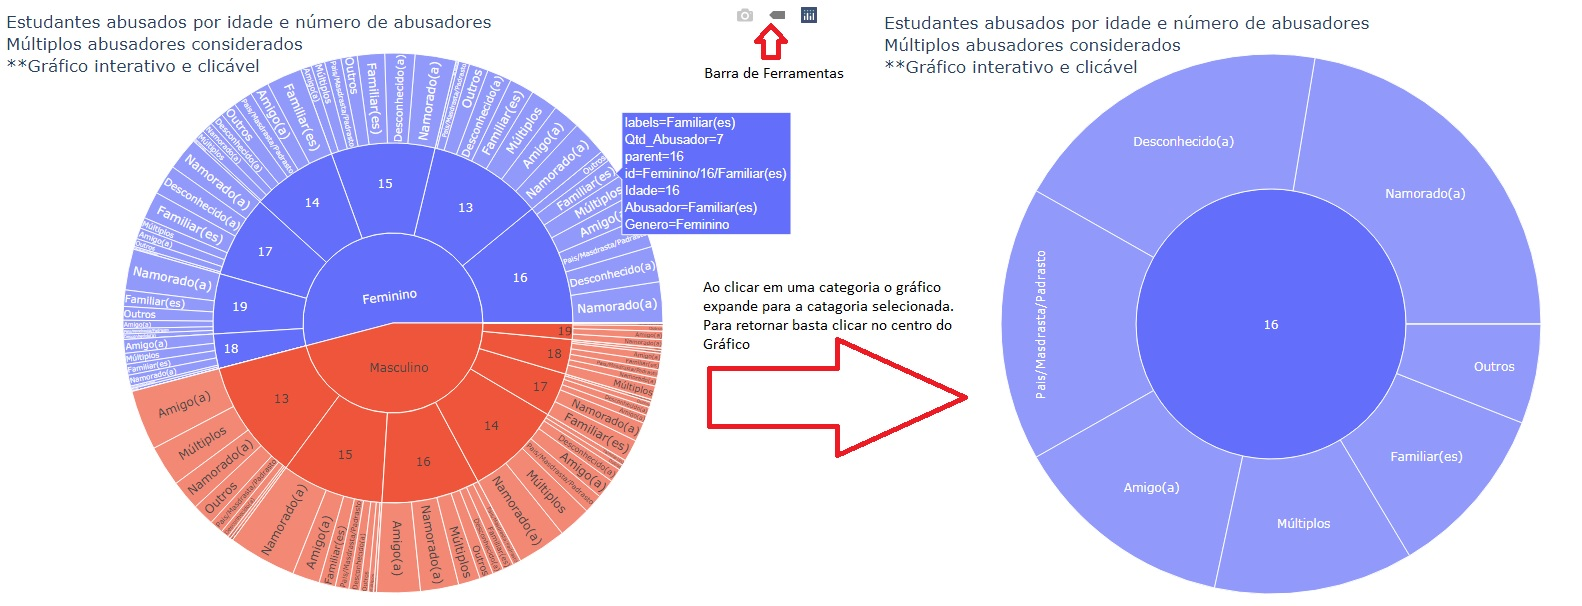

**A barra de ferramenta destes gráficos interativos, localizadas no canto superior direito, também adicionam funcionalidades a esta interatividade**

**Quando o gráfico interativo possuir legendas, estas também são clicáveis e isolam o dado correspondente**
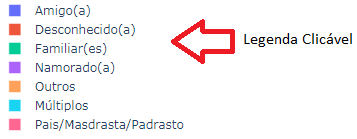

## Preparação do ambiente de análise


### Importação das bibliotecas que serão utilizadas

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from zipfile import ZipFile
from matplotlib.gridspec import GridSpec
from statsmodels.stats.weightstats import zconfint
from statsmodels.stats.weightstats import ztest

# Duas casas decimais serão utilizadas nas visualização do pandas - globalmente
pd.options.display.float_format = "{:.2f}".format

# Definindo a palette cm para o SeaBorn
cm = sns.light_palette("red", as_cmap=True)

In [89]:
# Instalando o Plotly caso necessário
!pip install plotly==4.12.0

In [90]:
# Importando Plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

### Importação da Base de Dados PeNSE 2015 Amostra 2

**Importação do arquivo ZIP**

In [91]:
path = "/content/drive/MyDrive/Datasets/AluraBootcamp/Módulo03/PeNSE_2015_AMOSTRA2.zip"
zipobj = ZipFile(path)

zipped_file_path = zipobj.namelist()[1]

In [92]:
# Para ver o conteúdo do arquivo zip instanciado e outras informações do zip
zipobj.infolist()

[<ZipInfo filename='arquivos csv/' external_attr=0x10>,
 <ZipInfo filename='arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV' compress_type=deflate external_attr=0x20 file_size=7262170 compress_size=1235667>,
 <ZipInfo filename='arquivos csv/PENSE_AMOSTRA2_ALUNOESCOLA.CSV' compress_type=deflate external_attr=0x20 file_size=11420533 compress_size=1329882>,
 <ZipInfo filename='arquivos csv/PENSE_AMOSTRA2_ESCOLA.CSV' compress_type=deflate external_attr=0x20 file_size=5000642 compress_size=114324>,
 <ZipInfo filename='arquivos sas/' external_attr=0x10>,
 <ZipInfo filename='arquivos sas/pense_amostra2_aluno.sas7bdat' compress_type=deflate external_attr=0x20 file_size=24691712 compress_size=1957530>,
 <ZipInfo filename='arquivos sas/pense_amostra2_alunoescola.sas7bdat' compress_type=deflate external_attr=0x20 file_size=45253632 compress_size=2461932>,
 <ZipInfo filename='arquivos sas/pense_amostra2_escola.sas7bdat' compress_type=deflate external_attr=0x20 file_size=18105344 compress_size=332162>,
 <Zip

In [93]:
# Mostra a lista de arquivos que estão no zip
zipobj.namelist()

['arquivos csv/',
 'arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV',
 'arquivos csv/PENSE_AMOSTRA2_ALUNOESCOLA.CSV',
 'arquivos csv/PENSE_AMOSTRA2_ESCOLA.CSV',
 'arquivos sas/',
 'arquivos sas/pense_amostra2_aluno.sas7bdat',
 'arquivos sas/pense_amostra2_alunoescola.sas7bdat',
 'arquivos sas/pense_amostra2_escola.sas7bdat',
 'arquivos xlsx/',
 'arquivos xlsx/PENSE_AMOSTRA2_ALUNO.xlsx',
 'arquivos xlsx/PENSE_AMOSTRA2_ALUNOESCOLA.xlsx',
 'arquivos xlsx/PENSE_AMOSTRA2_ESCOLA.xlsx',
 'Dicionario_PENSE_Microdados_AMOSTRA2.xls']

In [94]:
# Pegando o arquivo na posição 1
zipobj.namelist()[1]

'arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV'

Importando o Arquivo **PENSE_AMOSTRA2_ALUNO.CSV** com os dados que serão trabalhados

In [95]:
# Lendo o arquivo CSV
data = pd.DataFrame(pd.read_csv(zipobj.open(zipped_file_path), sep = ";", thousands=".", decimal=","))
data.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.00,1570.00,37.10,157.00,2,1,1223,1,299.74,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,3,2,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.00,1520.00,50.20,152.00,2,2,1223,1,355.17,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.00,1614.00,48.20,161.40,2,2,1223,1,299.74,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.00,1725.00,69.40,172.50,2,3,1223,1,355.17,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.00,1675.00,78.90,167.50,2,4,1223,1,299.74,1,2,4,1,5,1,296


**Verificando a características do arquivo - quantidade de Linhas e Colunas**

In [96]:
data.shape

(16556, 181)

### Carregando o dicionário de dados da pesquise PeNSE 2015 em um dicionário do Pandas

Carregando o arquivo xls - dicionário de dados

In [97]:
zipobj.namelist()[12]

'Dicionario_PENSE_Microdados_AMOSTRA2.xls'

In [98]:
dictionary_dataset = pd.read_excel(zipobj.read(zipobj.namelist()[-1]),sheet_name='AMOSTRA2_ALUNO', skipfooter=3)
dictionary_dataset.tail()

,VARIÁVEL,QUESTIONÁRIO DO ALUNO
1210,-1,Pulo no questionário
1211,1,Particular
1212,2,Comunitária
1213,3,Confessional
1214,4,Filantrópica


### Função a para a criação de um dataframe com as perguntas e respostas do dicionário de dados.

In [99]:
  #Inicializa os dicionários que serão usados
  answers = {}
  dictionary_by_id = {}

In [100]:
# Criação da Função para a geração do Dicionário de dados
def generate_dictionary_by_id():
  #Inicializa os dicionários que serão usados
  answers = {}

  # Varre o dataframe com o dicionário de dados
  for ind in dictionary_dataset.index:
      # Verifica se é uma pergunta pela característica do dado, no caso sendo string
      if (not str(dictionary_dataset.loc[ind]['VARIÁVEL']).isnumeric() and
          not str(dictionary_dataset.loc[ind]['VARIÁVEL']) == '-1'):
        # Antes de adicionar uma nova chave, adiciona um dicionário no segundo nível com as respostas
        # caso não seja a primeira linha
        if ind > 0:
          dictionary_by_id[key_id]['Respostas'] = answers
          answers = {} 

        # Chave Principal do dicionário  
        key_id = dictionary_dataset.loc[dictionary_dataset.index[ind]]['VARIÁVEL']
        
        # Adiciona a estrutura base do dicionário
        dictionary_by_id[key_id] = {
        'Codigo-Pergunta': dictionary_dataset.loc[dictionary_dataset.index[ind]]['VARIÁVEL'],
        'Pergunta': dictionary_dataset.loc[dictionary_dataset.index[ind]]['QUESTIONÁRIO DO ALUNO'],
        'Respostas': answers}
      
      else:
        # Adicionando as respostas
        if str(dictionary_dataset.loc[ind]['VARIÁVEL']).isnumeric():
          answers[int(dictionary_dataset.loc[ind]['VARIÁVEL'])] = dictionary_dataset.loc[ind]['QUESTIONÁRIO DO ALUNO']
        else:
          answers[dictionary_dataset.loc[ind]['VARIÁVEL']] = dictionary_dataset.loc[ind]['QUESTIONÁRIO DO ALUNO']
  return print('Dictionary generated successfully')



### Função para a criação de tabelas de frequências

In [101]:
#Função para a Criação de Tabelas de frequência
def frequency_table(dataframe1:       pd.DataFrame,
                    column_int_name:  str, 
                    column_name_new:  str,
                    col_name_dic:     dict()):

  """A partir de um dataframe original cria um novo dataframe com a coluna informada calculando a tabela de frequência 
     e renomando o índice.

    Parâmetros de entrada: 
      dataframe1      ->  Dataframe original
      column_int_name ->  String com o nomes da coluna que possui valores inteiros no Dataframe e que será utilizada nos cálculos
      column_name_new ->  Novo nome do índice/coluna do novo dataframe
      col_name_dic    ->  Dicionário, Dicionário com todos os valores que serão substituidos

   Retorno / Parâmetro de saída:
     Novo DataFrame Criado com a tabela de frequência

   Exemplo
    answers = {
      1: "Muito importante",
      2: "Importante",
      3: "Pouco importante",
      4: "Sem importância",
      99: "Não informado"
    }
    frequency_dist_body_image  = frequency_table(data, 'VB11006', 'Imagem Corporal', answers )
    frequency_dist_body_image

    Resultado:

    Imagem Corporal	    Frequency   	Rate
    Muito importante	  7102	        42.896835
    Importante	        6604	        39.888862
    Pouco importante	  1969	        11.892969
    Sem importância	    726	          4.385117
    Não informado	      155	          0.936216
  """
  # Busca a frequencia em quantidade.
  frequency = dataframe1[column_int_name].value_counts()
  # Calcula o percentual de frequencia.
  rate = dataframe1[column_int_name].value_counts(normalize = True) * 100

  # Cria o novo dataframe
  dataframe_out = pd.DataFrame({"Frequency": frequency, "Rate": rate})

  # Renomeando o Index e substituindo pelos valores do dicionário para a tabela de freqüencia
  dataframe_out.rename(index = col_name_dic, inplace = True)

  dataframe_out.rename_axis(column_name_new, axis=1, inplace=True)

  # Retorna o novo dataframe
  return(dataframe_out)

### Função para a estilização das tabelas de frequência

In [102]:
# Estilizando a visualização das tabelas de frequência
#Função para a Criação de Tabelas de frequência
def styled_table(dataframe1:       pd.DataFrame,
                 dataframe2:       pd.DataFrame):
  head = """
  <style>
  * {
    box-sizing: border-box;
  }

  .row {
    display: flex;
    margin-left:-5px;
    margin-right:-5px;
  }

  .column {
    flex: 50%;
    padding: 5px;
  }

  table {
    border-collapse: collapse;
    border-spacing: 0;
    width: 100%;
    border: 1px solid #ddd;
  }

  th, td {
    text-align: left;
    padding: 16px;
  }

  tr:nth-child(even) {
    background-color: #f2f2f2;
  }
  </style>
  <table>
      <thead>
          <th>Estudantes que não sofreram abuso sexual</th>
          <th>Estudantes que sofreram abuso sexual</th>
      </thead>
      </tbody>

  """
  head_body_image = head
  row = ""
  for series in [dataframe1,dataframe2]:
      series.name=''
      row += "<th>{}</th>".format(series.style.background_gradient(cmap=cm).set_precision(2).render())
  row += '</tr>'
  head_body_image += row

  series.style.background_gradient

  head_body_image+= """
  </tbody>
  </table>"""
  return head_body_image


In [103]:
# Estilização da Tabela de Conclusão
def styled_table_PeNSE(dataframe1:       pd.DataFrame,
                       dataframe2:       pd.DataFrame):
  head = """
  <style>
  * {
    box-sizing: border-box;
  }

  .row {
    display: flex;
    margin-left:-5px;
    margin-right:-5px;
  }

  .column {
    flex: 50%;
    padding: 5px;
  }

  table {
    border-collapse: collapse;
    border-spacing: 0;
    width: 100%;
    border: 1px solid #ddd;
  }

  th, td {
    text-align: left;
    padding: 16px;
  }

  tr:nth-child(even) {
    background-color: #f2f2f2;
  }
  </style>
  <table>
      <thead>
          <th>Pesquisa PeNSE 2015</th>
          <th>Pesquisa UNA 2015</th>
      </thead>
      </tbody>

  """
  head_body_image = head
  row = ""
  for series in [dataframe1,dataframe2]:
      series.name=''
      row += "<th>{}</th>".format(series.style.background_gradient(cmap=cm).set_precision(1).render())
      # Para remover o 0 do index no html gerado
      row = row.replace('>0</th>','></th>')
  row += '</tr>'
  head_body_image += row

  series.style.background_gradient

  head_body_image+= """
  </tbody>
  </table>"""
  return head_body_image

### Criação do Dicionário com as perguntas e respostas da pesquisa

In [104]:
# Criando um dataframe com o Dicionário de dados
generate_dictionary_by_id()

Dictionary generated successfully


In [105]:
# Consultando pela chave as respostas
dictionary_by_id['VB01001']['Respostas']

{1: 'Masculino', 2: 'Feminino'}

## Análise dos Dados

Para esta análise optei pela amostra 2 da pesquisa PeNSE 2015 (mais atual disponível no site do IBGE) que avaliou escolares de 13 a 17 anos de idade frequentando as etapas do 6º ao 9º ano do ensino fundamental (antigas 5a a 8a séries) e da 1a a 3a série do ensino médio.

Para efeito desta análise vou considerar as pessoas que **forçaram os estudantes a praticar sexo** como **abusador(es) sexual/sexuais** para maior claresa da análise e respeitando a definição do [Ministério Público do Distrito Federal e Territórios](
https://www.mpdft.mp.br/portal/index.php/conhecampdft-menu/nucleos-e-grupos/nevesca/perguntas-frequentes-mainmenu-428/3202-o-que-e-abuso-sexual#:~:text=Trata%2Dse%20de%20uma%20situa%C3%A7%C3%A3o,sexual%20com%20ou%20sem%20penetra%C3%A7%C3%A3o).

**Abuso Sexual** - *Trata-se de uma situação em que uma criança ou adolescente é invadido em sua sexualidade e usado para gratificação sexual de um adulto ou mesmo de um adolescente mais velho. Pode incluir desde carícias, manipulação dos genitais, mama ou ânus, voyeurismo, exibicionismo ou até o ato sexual com ou sem penetração. Muitas vezes o agressor pode ser um membro da própria família ou pessoa com quem a criança convive, ou ainda alguém que frequenta o círculo familiar. O abuso sexual deturpa as relações socioafetivas e culturais entre adultos e crianças ou adolescentes ao transformá-las em relações genitalizadas, erotizadas, comerciais, violentas e criminosas.*

Na conclusão desta análise vou comparar os resultados das hipóteses levantadas com o estudo realizado pela  **Universidad Nacional de Asunción (publicado em Dezembro de 2015) vide Referência bibliográfica**, sobre o Abuso Sexual e outras forma de violência com estudantes de nível médio no departamento de Alto Paraná. Este estudo foi realizado de também de forma anônima, assim como o **PeNSE 2015** mas com uma população menor entrevistando 661 estudantes 56 escolas. Será utilizada a sigla **UNA - 2015** para se referir a esta pesquisa,

Para a identificação do **abuso sexual**, vou trabalhar os dados com as seguintes questões da base de dados PeNSE 2015.

In [106]:
print(dictionary_by_id['VB01001'])
print(dictionary_by_id['VB01003'])
print(dictionary_by_id['VB09016'])
print(dictionary_by_id['VB0901701'])
print(dictionary_by_id['VB0901702'])
print(dictionary_by_id['VB0901703'])
print(dictionary_by_id['VB0901704'])
print(dictionary_by_id['VB0901705'])
print(dictionary_by_id['VB0901706'])

{'Codigo-Pergunta': 'VB01001', 'Pergunta': 'Qual é o seu sexo?', 'Respostas': {1: 'Masculino', 2: 'Feminino'}}
{'Codigo-Pergunta': 'VB01003', 'Pergunta': 'Qual é a sua idade?', 'Respostas': {11: '11 anos ou menos', 12: '12 anos', 13: '13 anos', 14: '14 anos', 15: '15 anos', 16: '16 anos ', 17: '17 anos', 18: '18 anos', 19: '19 anos ou mais'}}
{'Codigo-Pergunta': 'VB09016', 'Pergunta': 'Alguma vez na vida você foi forçado a ter relação sexual? ', 'Respostas': {-1: 'Pulo no questionário', 1: 'Sim', 2: 'Não', 99: 'Não informado'}}
{'Codigo-Pergunta': 'VB0901701', 'Pergunta': 'Um(a) namorado(a)/ex-namorado(a) forçou você a ter relação sexual?', 'Respostas': {-1: 'Pulo no questionário', 1: 'Sim', 2: 'Não', 99: 'Não informado'}}
{'Codigo-Pergunta': 'VB0901702', 'Pergunta': 'Um(a) amigo(a) forçou você a ter relação sexual?', 'Respostas': {-1: 'Pulo no questionário', 1: 'Sim', 2: 'Não', 99: 'Não informado'}}
{'Codigo-Pergunta': 'VB0901703', 'Pergunta': 'Seu pai/mãe/padastro/madrasta forçou voc

### Tratamento dos Dados

#### Gerando as colunas para auxílio no processo de análise

In [107]:
# Criando uma coluna que indica se houve alguma forma de abuso sexual.
data.loc[((data['VB09016']  == 1 ) 
        |(data['VB0901701'] == 1 )
        |(data['VB0901702'] == 1 )
        |(data['VB0901703'] == 1 )
        |(data['VB0901704'] == 1 )
        |(data['VB0901705'] == 1 )                                                                                    
        |(data['VB0901706'] == 1 )), 'Abuso_sexual'] = 'Sim'

# Preenchendo com Não os registros nulos.
data['Abuso_sexual'] = data['Abuso_sexual'].fillna('Não')
print('COLUNAS GERADAS \n------------------------------------------------------------------')
print(f'Resumo do preenchimento da coluna Abuso_sexual: {data["Abuso_sexual"].unique()}')

# Traduzindo a Coluna referênte a Gênero segundo o dicionário criado
data['VB01001'] = data['VB01001'].map(dictionary_by_id['VB01001']['Respostas'])
data.rename(columns={'VB01001': 'Genero'}, inplace=True)

# Renomeando a Coluna correspondente a Idade
data.rename(columns={'VB01003': 'Idade'}, inplace=True)
print(f'Resumo do preenchimento da coluna Genero: {data["Genero"].unique()}')

# Traduzindo a Coluna referênte a Cor/Raça segundo o dicionário criado
data['VB01002'] = data['VB01002'].map(dictionary_by_id['VB01002']['Respostas'])
data.rename(columns={'VB01002': 'Cor'}, inplace=True)
print(f'Resumo do preenchimento da coluna Cor/Raça: {data["Cor"].unique()}')




COLUNAS GERADAS 
------------------------------------------------------------------
Resumo do preenchimento da coluna Abuso_sexual: ['Não' 'Sim']
Resumo do preenchimento da coluna Genero: ['Feminino' 'Masculino']
Resumo do preenchimento da coluna Cor/Raça: ['Branca' 'Parda' 'Amarela' 'Indígena' 'Preta' 'Não informado']


Criando uma coluna para classificar o abusador para estudantes que foram forçados a manter relações sexuais

In [108]:
def f(x):
  if x['VB0901701'] == 1: return 'Namorado(a)'
  elif x['VB0901702'] == 1: return 'Amigo(a)'
  elif x['VB0901703'] == 1: return 'Pais/Masdrasta/Padrasto'
  elif x['VB0901704'] == 1: return 'Familiar(es)'
  elif x['VB0901705'] == 1: return 'Desconhecido(a)'
  elif x['VB0901706'] == 1: return 'Outros'
  else: return 'Não'

data['Abusador'] = data.apply(f, axis=1)
data.loc[(data['Abusador'] == 'Não') & (data['VB09016'] == 1), 'Abusador'] = 'Não informado'

print(f'Resumo do preenchimento da coluna com os tipos de Abusadores: {data["Abusador"].unique()}')

Resumo do preenchimento da coluna com os tipos de Abusadores: ['Não' 'Outros' 'Amigo(a)' 'Pais/Masdrasta/Padrasto' 'Familiar(es)'
 'Desconhecido(a)' 'Namorado(a)' 'Não informado']


Criando uma coluna para quantificar os abusadores por estudantes para verificar a hipótese de estudantes possuirem mais de um abusador.

In [109]:
def f(x):
  cont = 0
  if x['VB0901701'] == 1: 
    cont += 1
  if x['VB0901702'] == 1: 
    cont += 1
  if x['VB0901703'] == 1: 
    cont += 1
  if x['VB0901704'] == 1: 
    cont += 1
  if x['VB0901705'] == 1: 
    cont += 1
  if x['VB0901706'] == 1:
    cont += 1
  return cont

data['Qtd_Abusador'] = data.apply(f, axis=1)
data['Qtd_Abusador'] = data['Qtd_Abusador'].fillna(0) 


In [110]:
data.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,Genero,Cor,Idade,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma,Abuso_sexual,Abusador,Qtd_Abusador
0,2015,76,1,1,Feminino,Branca,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.00,1570.00,37.10,157.00,2,1,1223,1,299.74,1,2,4,1,1,1,296,Não,Não,0
1,2015,76,1,1,Feminino,Branca,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.00,1520.00,50.20,152.00,2,2,1223,1,355.17,1,2,4,1,2,1,296,Não,Não,0
2,2015,76,1,1,Masculino,Parda,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.00,1614.00,48.20,161.40,2,2,1223,1,299.74,1,2,4,1,3,1,296,Não,Não,0
3,2015,76,1,1,Masculino,Branca,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.00,1725.00,69.40,172.50,2,3,1223,1,355.17,1,2,4,1,4,1,296,Não,Não,0
4,2015,76,1,1,Masculino,Branca,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.00,1675.00,78.90,167.50,2,4,1223,1,299.74,1,2,4,1,5,1,296,Sim,Outros,1


Há casos onde a pergunta **VB09016 - Alguma vez na vida você foi forçado a ter relação sexual?** foi respondida com **"Sim"** mas o abusador não foi informado nas perguntas subsequentes? 

In [111]:
data.loc[(data['Abusador'] == 'Não informado') & (data['VB09016'] == 1)][['VB09016','VB0901701', 'VB0901702', 'VB0901703','VB0901704', 'VB0901705', 'VB0901706','Abuso_sexual', 'Abusador', 'Qtd_Abusador']]

,VB09016,VB0901701,VB0901702,VB0901703,VB0901704,VB0901705,VB0901706,Abuso_sexual,Abusador,Qtd_Abusador
1480,1,99,99,99,99,99,99,Sim,Não informado,0
3261,1,99,99,99,99,99,99,Sim,Não informado,0
9205,1,99,99,99,99,99,99,Sim,Não informado,0
12634,1,99,99,99,99,99,99,Sim,Não informado,0


Sim foram encontrados quatro ocorrências e para estes 4 casos, todas as perguntas referentes a classe do agressor foram respondidas como **99 - Não informado**.

Perguntas respondidas como **99 - Não informado**:

**VB0901701** - Um(a) namorado(a)/ex-namorado(a) forçou você a ter relação sexual?

**VB0901702** - Um(a) amigo(a) forçou você a ter relação sexual?

**VB0901703** - Seu pai /mãe / padastro / madrasta forçou você a ter relação sexual?

**VB0901704** - Outros familiares forçaram você a ter relação sexual?

**VB0901705** - Um(a) desconhecido(a) forçou você a ter relação sexual?

**VB0901706** - Outras pessoas forçaram você a ter relação sexual?

Realizarei o ajuste das informações nas colunas necessárias abaixo

In [112]:
# Ajustando as Colunas que para o tipo de Abusador Não informado
data.loc[data['Abusador'] == "Não informado", 'Qtd_Abusador'] = 1
data.loc[data['Abusador'] == "Não informado", 'Abuso_sexual'] = 'Sim'
data.loc[data['Qtd_Abusador'] > 0, 'Qtd_Abusado'] = 1
data['Qtd_Abusado'] = data['Qtd_Abusado'].fillna(0)
data.loc[(data['Abusador'] == 'Não informado') & (data['VB09016'] == 1)][['VB09016','VB0901701', 'VB0901702', 'VB0901703','VB0901704', 'VB0901705', 'VB0901706','Abuso_sexual', 'Abusador', 'Qtd_Abusador', 'Qtd_Abusado']]

,VB09016,VB0901701,VB0901702,VB0901703,VB0901704,VB0901705,VB0901706,Abuso_sexual,Abusador,Qtd_Abusador,Qtd_Abusado
1480,1,99,99,99,99,99,99,Sim,Não informado,1,1.00
3261,1,99,99,99,99,99,99,Sim,Não informado,1,1.00
9205,1,99,99,99,99,99,99,Sim,Não informado,1,1.00
12634,1,99,99,99,99,99,99,Sim,Não informado,1,1.00


As colunas **Abuso_sexual, Abusador e Qtd_Abusador** foram ajustadas, portanto podemos prosseguir com a análise.

### Hipóteses

Ajustando a Coluna criada "Abusador" para o valor "Múltiplos" para checar a hipótese de abuso por mais de uma classe de abusador. Ex. Familiar(es) e Namorado(a)


In [113]:
data.loc[((data['Qtd_Abusador']  > 1 )), 'Abusador'] = 'Múltiplos'

Gerando um Dataframe filtrando casos em que as respostas das perguntas que analisaremos tenham como resposta 1 - Sim. Estão sendo descartadas as respostas: -1: 'Pulo no questionário', 2 - Não e 99: 'Não informado'

In [114]:
# Estão sendo descartadas as respostas: -1: 'Pulo no questionário' e 99: 'Não informado'
students_data = data.query( '(VB09016   == 1)'
                          '| (VB0901701 == 1)'
                          '| (VB0901702 == 1)'
                          '| (VB0901703 == 1)' 
                          '| (VB0901704 == 1)' 
                          '| (VB0901705 == 1)'
                          '| (VB0901706 == 1)')
students_data.shape

(569, 185)

##### Qual o tamanho da população que será analisada?##### 

In [115]:
print(
    f"""Da base de dados PeNSE 2015, um total de \033[1m{students_data.shape[0]}\033[ """
     """estudantes que responderam \033[1mSim\033[ para pelo menos uma das perguntas analisadas \nsobre abuso sexual""")
print('------------------------------------------------------------------')
print(f'População total PeNSE 2015 Amostra 2: \033[1m{data.shape[0]}\033[')
print(f'Percentual da população total que sofreram abusos: \033[1m{round((students_data.shape[0]/data.shape[0])*100,2)}%\033[')

Da base de dados PeNSE 2015, um total de 569[ estudantes que responderam Sim[ para pelo menos uma das perguntas analisadas 
sobre abuso sexual
------------------------------------------------------------------
População total PeNSE 2015 Amostra 2: 16556[
Percentual da população total que sofreram abusos: 3.44%[


##### Há heterogeneidade nas quantidades de estudantes abusados? 

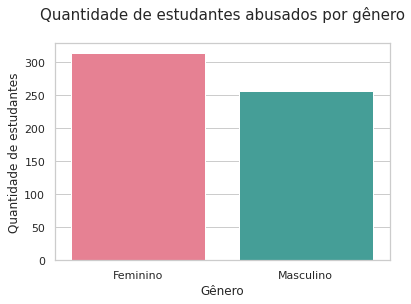

In [116]:
# Criando um dataframe com a quantidade de estudantes que sofreram abuso por gênero
sexual_assault_gender = pd.DataFrame(students_data.groupby('Genero')['Genero'].count())

# Nomeando corretamente a coluna de quantidade
sexual_assault_gender.rename(columns={'Genero': 'Quantidade'}, inplace=True)
sexual_assault_gender['Quantidade']

ax = sns.barplot( x=sexual_assault_gender.index, y='Quantidade',data=sexual_assault_gender, palette='husl')

ax.set_title('''Quantidade de estudantes abusados por gênero
''', fontsize=15)
ax.set_xlabel('Gênero')
ax.set_ylabel('Quantidade de estudantes')

ax;

**O maior volume de estudantes que sofreu abuso é do sexo feminino**

Gráfico para detalhamento e proporcionalidade quanto a população total analisada

In [117]:
sex_assault_total = students_data.count().unique()[0]
students_total = data.count().unique()[0]
 
labels = sexual_assault_gender.index
values = sexual_assault_gender['Quantidade']

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=['Total','Vítimas'],
                     values=[students_total-sex_assault_total,sex_assault_total], 
                     name="Total",
                     rotation=47,
                     marker_colors=['rgb(175, 51, 61)'],
                     pull=[0, 0.3]),     
              1, 1)
fig.add_trace(go.Pie(labels=labels, 
                     values=values, 
                     name="Amostra Afetada",
                     marker_colors=['rgb(17, 103, 177)', 'rgb(208, 239, 255)'],), 
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+value")

fig.update_layout(
    title_text="Total de estudantes da base PeNSE 2015 e proporção de vítimas de abuso sexual por gênero<br>**Gráfico interativo ",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Total', x=0.19, y=0.5, font_size=20, showarrow=False),
                 dict(text='Vítimas', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.add_annotation(x=.65, y=.91,
            text=f"Detalhamento das vítimas ",
            showarrow=True,
            arrowhead=1,
            arrowcolor="red",
            arrowsize=1,
            arrowwidth=3,
            xanchor="center",
            yanchor="bottom")

fig.add_annotation(x=.32, y=.91,
            text=f"Vítimas de Abuso ",
            showarrow=True,
            arrowhead=1,
            arrowcolor="red",
            arrowsize=1,
            arrowwidth=3,
            xanchor="center",
            yanchor="bottom")

fig.show()

**No gráfico acima percebemos que a amostra de estudantes que sofreram abusos sexual correspondem à 3,44 % da base total PeNSE 2015 e que a proporção maior é para indivíduos do sexo feminino.**

##### Há estudantes que sofreram abusos sexuais de múltiplos abusadores?

In [118]:
# Separando os casos de estudantes com múltiplos abusadores
multiple_sex_abused_total = students_data.loc[students_data['Qtd_Abusador'] > 1]

In [119]:
# Criando um Dataframe com casos de Estudantes com múltiplos abusadores por gênero e Idade
multiple_sex_abused = students_data.loc[students_data['Qtd_Abusador'] > 1].set_index('Genero')[['Idade','Qtd_Abusador']]
multiple_sex_abused = multiple_sex_abused.groupby([multiple_sex_abused.index, multiple_sex_abused.Idade]).count()
multiple_sex_abused.rename(columns={'Qtd_Abusador': 'Qtd_Abusados'}, inplace=True)
multiple_sex_abused.reset_index(inplace=True)

Plotando a comparação com a amostra de estudantes abusados totais vs estudantes que foram abusados por mais de uma classe de abusador

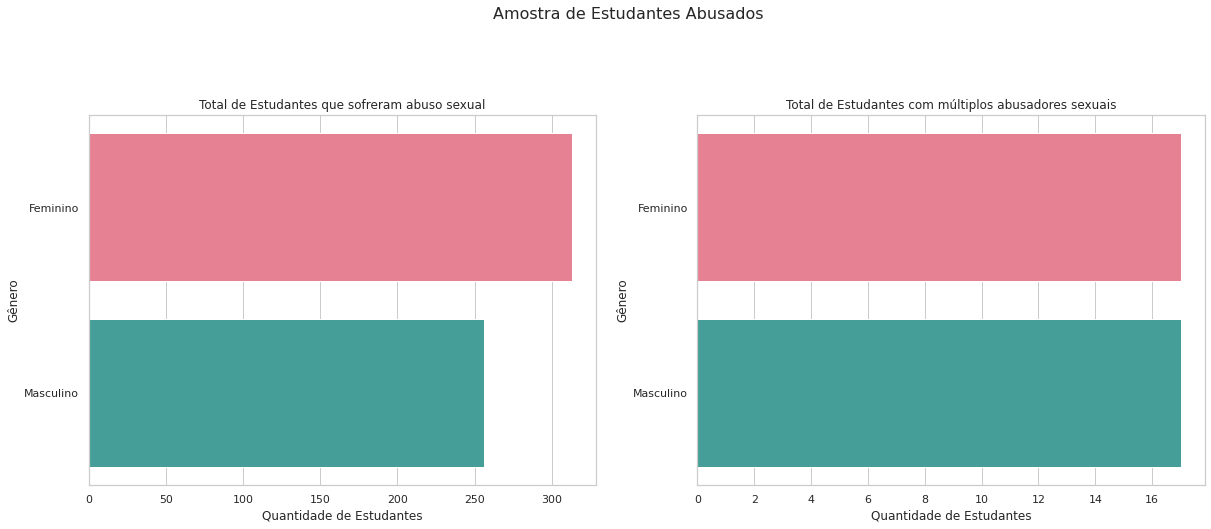

In [120]:
sns.set(style="whitegrid")

plt.figure(2, figsize=(20,15))
the_grid = GridSpec(2, 2)

# Total da Amostra
plt.subplot(the_grid[0, 0],  title='Total de Estudantes que sofreram abuso sexual')
sns.countplot(y='Genero', data=students_data, 
              order=['Feminino', 'Masculino'], palette='husl')  
plt.xlabel('Quantidade de Estudantes')
plt.ylabel('Gênero')

# Múltiplos Abusadores
plt.subplot(the_grid[0, 1], title='Total de Estudantes com múltiplos abusadores sexuais')
sns.countplot(y='Genero', data=students_data.loc[students_data['Qtd_Abusador'] > 1], 
              order=['Feminino', 'Masculino'], palette='husl')
plt.xlabel('Quantidade de Estudantes')
plt.ylabel('Gênero')
plt.suptitle('Amostra de Estudantes Abusados', fontsize=16)
plt.show()

**A hipótese é valida pois 17 estudantes do sexo masculino e 17 estudantes do sexo feminino possuem mais de 1 abusador.**

Analisando a distribuição por idade dos casos onde ocorreram abusos por mais de um abusador.

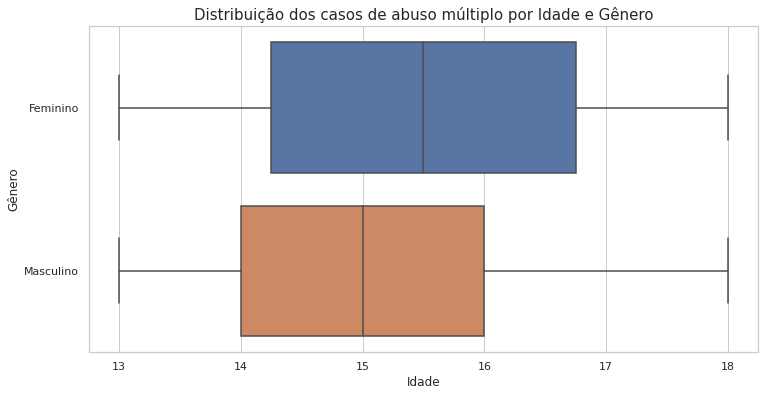

In [121]:
# Bloxplot
# Genero por Número de Abusadores
ax = sns.boxplot(data = multiple_sex_abused, x= 'Idade', y ='Genero', orient='h') # Determinar horizontal sempre horizontal quando for mais de um box plot
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição dos casos de abuso múltiplo por Idade e Gênero', fontsize=15)
ax.set_xlabel('Idade')
ax.set_ylabel('Gênero')
ax;

**Nota-se que as mulheres tem maior frequência de abuso por múltiplos abusadores dentro das faixas de idade analisadas.**

##### Quais são as idades onde ocorrem o maior número de abusos na amostra analisada? Há diferenças por gênero?

Utilizando o **Ztest** para verificar se as médias das idades onde ocorreram o abuso sexual são iguais entre homens e mulheres.

In [122]:
# Zteste calcula a média das distribuições
male_age_distribution  = data.query('Genero == "Masculino" & Abuso_sexual == "Sim"')['Idade']
female_age_distribution = data.query('Genero == "Feminino" & Abuso_sexual == "Sim"')['Idade']

_, p_value = ztest(male_age_distribution, female_age_distribution) # Retorna uma tupla
p_value # p_value < 0.05 - médias entre as distribuições são iguais. p_value = 0 descartar a - hipótese nula(0) não é verdadeira

print('Hipótese a ser avalidada (NULA): \033[1mA média da idade entre homens e mulheres, que sofreram abuso sexual, é a mesma.\033[\n')

if p_value <0.05:
  print("\033[1m>>Hipótese NULA rejeitada\033[ - as médias de idades são diferentes para homens e mulheres.")
else:
  print("\033[1m>>Hipótese NULA aceita\033[ -  as médias de idades são diferentes para homens e mulheres.")

Hipótese a ser avalidada (NULA): A média da idade entre homens e mulheres, que sofreram abuso sexual, é a mesma.[

>>Hipótese NULA rejeitada[ - as médias de idades são diferentes para homens e mulheres.


In [123]:
# Criando um Dataframe com casos de Estudantes abusados por gênero e Idade
students_sex_abusers = students_data.groupby(['Genero','Idade'])[['Genero','Idade']].count()
students_sex_abusers.rename(columns={'Genero': 'Quantidade'}, inplace=True)
students_sex_abusers.drop(columns=['Idade'], inplace=True)
students_sex_abusers.reset_index(inplace=True)

Plotando os dados por idade, por gênero e onde ocorre o maior número de abusos

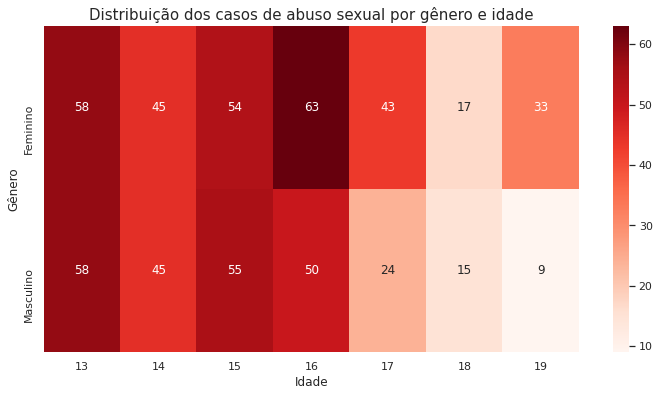

In [124]:
# Criando uma Tabela pivot com as quantidades.
to_plot = students_sex_abusers.pivot('Genero', 'Idade', 'Quantidade')

# Plotanto um HeatMap 
ax = sns.heatmap(to_plot, annot=True, fmt='d', cmap='Reds')
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição dos casos de abuso sexual por gênero e idade', fontsize=15)
ax.set_ylabel('Gênero')

ax;

In [125]:
colors = {
    'Masculino': '#0288D1',
    'Feminino': '#4dd2ff'
}
fig = px.histogram(students_data, x="Idade", color="Genero", 
                   marginal="box", # can be `box`, `violin`
                   color_discrete_map=colors,
                   hover_data=students_data.columns)\
                   .update_traces(dict(marker_line_width=1,
                                             marker_line_color="white"
                                             ))
fig.update_layout(
    yaxis_title_text = 'Quantidade',
    template="simple_white",
    title = { 'text': 'Distribuição das vítimas por idade e gênero<br> *** Gráfico interativo e clicável <br>', 'xanchor': 'center',
          'yanchor': 'top', 'y': 0.96, 'x': 0.45, 'font': dict(size=20)
           },
    legend_title_text='Gênero',
    showlegend=True,
    yaxis = { 'title': 'Quantidade de Estudantes'},
    xaxis={'title': 'Idade em anos','categoryorder':'total ascending'},
    autosize = False,
    width = 700,
    height = 450)

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='Black')),
                  selector=dict(mode='markers'))

fig.show()

**Nota-se que o maior número de casos de abuso sexual ocorre por volta dos 16 anos para as mulheres e 13 anos para os homens, onde para ambos o período de maior frequência se situa na faixa de idade entre 13 à 16 anos de idade.**

##### Ha homogeneidade nas quantidades de estudantes abusados por raça/cor?

In [126]:
# Gráfico por Gênero, Idade e classe do abusador
fig = px.sunburst(students_data, path=['Cor', 'Genero', 'Idade',], values='Qtd_Abusado', color='Cor', hover_data=['Idade','Qtd_Abusado'] )
fig.update_layout(
    margin = dict(t=50, l=10, r=10, b=10),
    title = { 'text': 'Estudantes que sofreram abuso sexual por raça/cor, gênero, e idade<br>**Gráfico interativo e clicável'},
    height = 600,
    width = 860
)
fig.show()

**Os estudantes da raça/cor parda são os que mais sofrem abusos sexuais**

##### Qual a distribuição, por idade e gênero dos estudantes, dos tipos de abusadores?

*O gráfico abaixo mostra o total de estudantes que foram forçados a praticar sexo por idade e pela quantidade de abusadores. Como exemplo, para abusadores múltiplos e, se um estudante de 15 anos foi submetido a abuso por mais de um abusador, será considerado uma nova instância (valor + 1) para o tipo de abusador correspondente e também para o tipo "Multiplos". Para quem sofreu abuso de apenas um tipo de abusador, será considerado apenas valor 1 na somatória das quantidades.*

In [127]:
# Gráfico por Gênero, Idade e classe do abusador
fig = px.sunburst(data, path=['Genero', 'Idade', 'Abusador'], 
                  values='Qtd_Abusador', color='Genero', 
                  hover_data=['Idade','Abusador'] )
fig.update_layout(
    margin = dict(t=50, l=10, r=10, b=10),
    title = { 'text': '''
    Estudantes abusados por idade e número de abusadores <br>Múltiplos abusadores considerados <br>**Gráfico interativo e clicável<br>'''},
    height = 600,
    width = 860
)
fig.show()

**Note-se que as mulheres também possuem maior número de abusadores múltiplos do que os homens. Elas ainda sobrem mais abusos dos Namorado(a) e Amigo(a)**

In [128]:
# Criando um dataframe com a quantidade de abusos realizados por idade e tipo de abusador.
sexual_assault_quantities = students_data.groupby(['Idade','Abusador'])['REGEOGR'].count().reset_index()
sexual_assault_quantities.rename(columns={'REGEOGR': 'Quantidade'}, inplace=True)

In [129]:
# Criando um dataframe com a quantidade de abusos realizados por Gênero, idade e tipo de abusador.
sexual_assault_quantities_gender = students_data.groupby(['Genero','Idade','Abusador'])['REGEOGR'].count().reset_index()
sexual_assault_quantities_gender.rename(columns={'REGEOGR': 'Quantidade'}, inplace=True)

#### Há linhas de tendência entre idade e tipos de abusadores sexuais da amostra analisada?

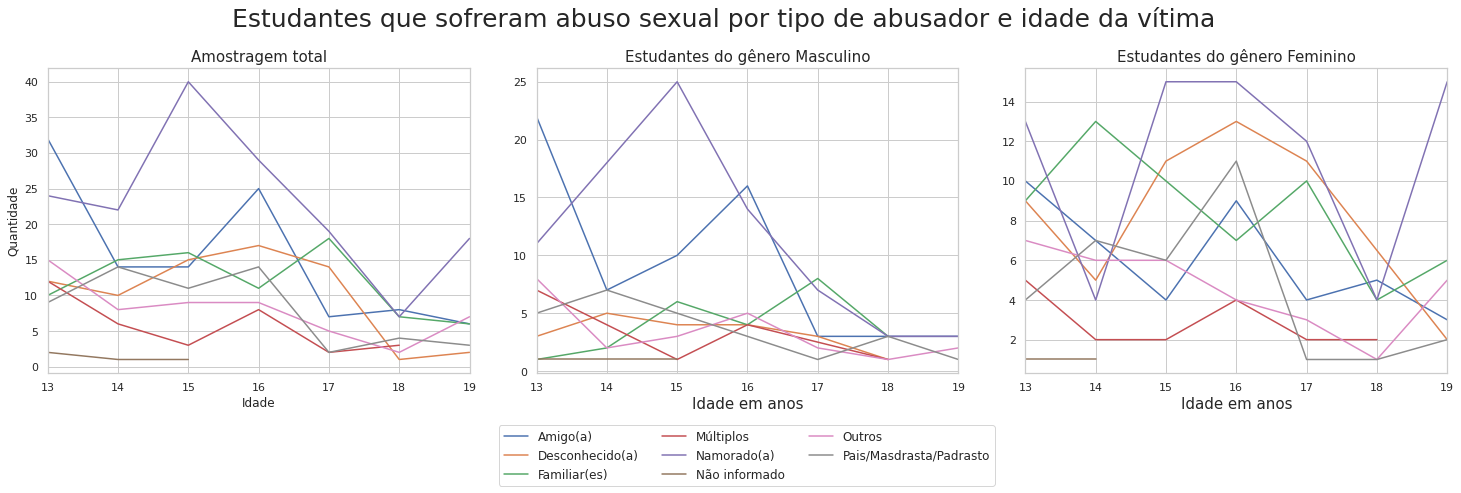

In [130]:
## Plotando gráfico de Linhas
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
ax1 = sns.lineplot(data=sexual_assault_quantities, 
                    x='Idade', 
                    y='Quantidade', 
                    hue='Abusador')
ax1.legend_.remove()
ax1.set_title('Amostragem total', fontsize=15)
ax1.grid(which='both', linestyle='-')
ax1.set_xlim(13,19)

plt.tight_layout(pad=0, h_pad=4, w_pad=5)
plt.subplot(1,3,2)

ax2 = sns.lineplot(data=sexual_assault_quantities_gender.query('Genero == "Masculino"'), 
                    x='Idade', 
                    y='Quantidade', 
                    hue='Abusador')

# Gerando uma Legenda única para todos os gráficos
ax2.legend(ncol=3,
           bbox_to_anchor=(1.1,-0.15), 
           fontsize=12)

ax2.set_xlabel('''Idade em anos
''', fontsize=15)
ax2.set_ylabel('')
ax2.set_title('Estudantes do gênero Masculino', fontsize=15)
ax2.grid(which='both', linestyle='-')
ax2.set_xlim(13,19)

plt.subplot(1,3,3)
ax3 = sns.lineplot(data=sexual_assault_quantities_gender.query('Genero == "Feminino"'), 
                    x='Idade', 
                    y='Quantidade', 
                    hue='Abusador')
ax3.legend_.remove()
ax3.set_xlabel('''Idade em anos
''', fontsize=15)
ax3.set_ylabel('')
ax3.set_title('Estudantes do gênero Feminino', fontsize=15)
ax3.grid(which='both', linestyle='-')
ax3.set_xlim(13,19)

plt.suptitle('''Estudantes que sofreram abuso sexual por tipo de abusador e idade da vítima \n\n
''', fontsize=25, y=1.12)

plt.show()

As tendências que consegui identificar são: 

* É possível perceber que os abusadores **não informados** estão na faixa de idade de 14 à 15 anos dos abusados. 
* Entre as de 14 à 17 anos há um amumento de abusos realizados por **Amigo(a)**

Como não identifiquei nenhuma outra tendência, vou explorar estes dados em um **gráfico interativo de barras agrupadas** abaixo.

Plotanto um gráfico interativo com a distribuição dos tipos de abusadores por idade.

In [131]:
# Plotando os estudantes que tiveram relações sexuais forçadas por classe do abusador
to_plot = go.Figure(data=[go.Bar(
    name = 'Amigo(a)',
    x=sexual_assault_quantities.query('Abusador == "Amigo(a)"')['Idade'],
    y=sexual_assault_quantities.query('Abusador == "Amigo(a)"')['Quantidade'],
    hovertemplate=
    "<b>Amigo(a)</b><br><br>" +
    "Idade: %{x}<br>" +
    "Quantidade: %{y}<br>" +
    "<extra></extra>"
   ), 
   go.Bar(
    name = 'Desconhecido(a)',
    x=sexual_assault_quantities.query('Abusador == "Desconhecido(a)"')['Idade'],
    y=sexual_assault_quantities.query('Abusador == "Desconhecido(a)"')['Quantidade'],
    hovertemplate=
    "<b>Desconhecido(a)</b><br><br>" +
    "Idade: %{x}<br>" +
    "Quantidade: %{y}<br>" +
    "<extra></extra>"
   ),
   go.Bar(
    name = 'Familiar(es)',
    x=sexual_assault_quantities.query('Abusador == "Familiar(es)"')['Idade'],
    y=sexual_assault_quantities.query('Abusador == "Familiar(es)"')['Quantidade'],
    hovertemplate=
    "<b>Familiar(es)</b><br><br>" +
    "Idade: %{x}<br>" +
    "Quantidade: %{y}<br>" +
    "<extra></extra>"
   ),
   go.Bar(
    name = 'Namorado(a)',
    x=sexual_assault_quantities.query('Abusador == "Namorado(a)"')['Idade'],
    y=sexual_assault_quantities.query('Abusador == "Namorado(a)"')['Quantidade'],
    hovertemplate=
    "<b>Namorado(a)</b><br><br>" +
    "Idade: %{x}<br>" +
    "Quantidade: %{y}<br>" +
    "<extra></extra>"
   ),
   go.Bar(
    name = 'Outros',
    x=sexual_assault_quantities.query('Abusador == "Outros"')['Idade'],
    y=sexual_assault_quantities.query('Abusador == "Outros"')['Quantidade'],
    hovertemplate=
    "<b>Outros</b><br><br>" +
    "Idade: %{x}<br>" +
    "Quantidade: %{y}<br>" +
    "<extra></extra>"
   ),
   go.Bar(
    name = 'Múltiplos',
    x=sexual_assault_quantities.query('Abusador == "Múltiplos"')['Idade'],
    y=sexual_assault_quantities.query('Abusador == "Múltiplos"')['Quantidade'],
    hovertemplate=
    "<b>Múltiplos</b><br><br>" +
    "Idade: %{x}<br>" +
    "Quantidade: %{y}<br>" +
    "<extra></extra>"
   ),   
   go.Bar(
    name = 'Pais/Masdrasta/Padrasto',
    x=sexual_assault_quantities.query('Abusador == "Pais/Masdrasta/Padrasto"')['Idade'],
    y=sexual_assault_quantities.query('Abusador == "Pais/Masdrasta/Padrasto"')['Quantidade'],
    hovertemplate=
    "<b>Pais/Masdrasta/Padrasto</b><br><br>" +
    "Idade: %{x}<br>" +
    "Quantidade: %{y}<br>" +
    "<extra></extra>"
   )
])

# Ajustando o Layout
to_plot.update_layout(
    template = 'plotly_white',
    title = { 'text': 'Estudantes que foram forçados a praticar sexo por tipo de agressor <br>**Gráfico interativo e clicável',
              'font': dict(size=20) },
    legend=dict(title='', orientation="v", y=0.96,
                yanchor="bottom", xanchor="right", x = 1),
    yaxis = { 'title': 'Quantidade de estudantes', 'categoryorder': 'total descending'},
    xaxis = { 'title': 'Idade em anos', 'categoryorder': 'total descending' },
    autosize = True, 
    hovermode = 'closest'
)

to_plot.update_traces(textposition='auto')
to_plot.update_layout(uniformtext_minsize=12, uniformtext_mode='hide',legend=dict(
        x=1.01,
        y=0.6
    ))

to_plot.layout.title.x=0.55
to_plot.update_coloraxes(colorbar_bgcolor="rgba(0,0,0,0)")

to_plot.update_layout(barmode='group')

to_plot.show()


**Há diferenças perceptíveis por gênero?**

In [132]:
# Plotando os estudantes que tiveram relações sexuais forçadas por classe do abusador
to_plot = go.Figure(data=[go.Bar(
    name = 'Amigo(a)',
    x=[sexual_assault_quantities_gender.query('Abusador == "Amigo(a)"')['Genero'],
    sexual_assault_quantities_gender.query('Abusador == "Amigo(a)"')['Idade']],
    y=sexual_assault_quantities_gender.query('Abusador == "Amigo(a)"')['Quantidade'],
    hovertemplate=
    "<b>Amigo(a)</b><br><br>" +
    "Idade: %{x}<br>" +
    "Quantidade: %{y}<br>" +
    "<extra></extra>"
   ), 
   go.Bar(
    name = 'Desconhecido(a)',
    x=[sexual_assault_quantities_gender.query('Abusador == "Desconhecido(a)"')['Genero'],
    sexual_assault_quantities_gender.query('Abusador == "Desconhecido(a)"')['Idade']],
    y=sexual_assault_quantities_gender.query('Abusador == "Desconhecido(a)"')['Quantidade'],
    hovertemplate=
    "<b>Desconhecido(a)</b><br><br>" +
    "Idade: %{x}<br>" +
    "Quantidade: %{y}<br>" +
    "<extra></extra>"
   ),
   go.Bar(
    name = 'Familiar(es)',
    x=[sexual_assault_quantities_gender.query('Abusador == "Familiar(es)"')['Genero'],
    sexual_assault_quantities_gender.query('Abusador == "Familiar(es)"')['Idade']],
    y=sexual_assault_quantities_gender.query('Abusador == "Familiar(es)"')['Quantidade'],
    hovertemplate=
    "<b>Familiar(es)</b><br><br>" +
    "Idade: %{x}<br>" +
    "Quantidade: %{y}<br>" +
    "<extra></extra>"
   ),
   go.Bar(
    name = 'Namorado(a)',
    x=[sexual_assault_quantities_gender.query('Abusador == "Namorado(a)"')['Genero'],
    sexual_assault_quantities_gender.query('Abusador == "Namorado(a)"')['Idade']],
    y=sexual_assault_quantities_gender.query('Abusador == "Namorado(a)"')['Quantidade'],
    hovertemplate=
    "<b>Namorado(a)</b><br><br>" +
    "Idade: %{x}<br>" +
    "Quantidade: %{y}<br>" +
    "<extra></extra>"
   ),
   go.Bar(
    name = 'Outros',
    x=[sexual_assault_quantities_gender.query('Abusador == "Outros"')['Genero'],
    sexual_assault_quantities_gender.query('Abusador == "Outros"')['Idade']],
    y=sexual_assault_quantities_gender.query('Abusador == "Outros"')['Quantidade'],
    hovertemplate=
    "<b>Outros</b><br><br>" +
    "Idade: %{x}<br>" +
    "Quantidade: %{y}<br>" +
    "<extra></extra>"
   ),
   go.Bar(
    name = 'Múltiplos',
    x=[sexual_assault_quantities_gender.query('Abusador == "Múltiplos"')['Genero'],
    sexual_assault_quantities_gender.query('Abusador == "Múltiplos"')['Idade']],
    y=sexual_assault_quantities_gender.query('Abusador == "Múltiplos"')['Quantidade'],
    hovertemplate=
    "<b>Múltiplos</b><br><br>" +
    "Idade: %{x}<br>" +
    "Quantidade: %{y}<br>" +
    "<extra></extra>"
   ),   
   go.Bar(
    name = 'Pais/Masdrasta/Padrasto',
    x=[sexual_assault_quantities_gender.query('Abusador == "Pais/Masdrasta/Padrasto"')['Genero'],
    sexual_assault_quantities_gender.query('Abusador == "Pais/Masdrasta/Padrasto"')['Idade']],
    y=sexual_assault_quantities_gender.query('Abusador == "Pais/Masdrasta/Padrasto"')['Quantidade'],
    hovertemplate=
    "<b>Pais/Masdrasta/Padrasto</b><br><br>" +
    "Idade: %{x}<br>" +
    "Quantidade: %{y}<br>" +
    "<extra></extra>"
   )
])

# Ajustando o Layout
to_plot.update_layout(
    template = 'plotly_white',
    title = { 'text': 'Estudantes que foram forçados a praticar sexo por tipo de agressor e Gênero <br>**Gráfico interativo e clicável',
              'font': dict(size=20) },
    legend=dict(title='', orientation="v", y=0.96,
                yanchor="bottom", xanchor="right", x = 1),
    yaxis = { 'title': 'Quantidade de estudantes', 'categoryorder': 'total descending'},
    xaxis = { 'title': 'Idade em anos', 'categoryorder': 'total descending' },
    autosize = True, 
    hovermode = 'closest'
)

to_plot.update_traces(textposition='auto')
to_plot.update_layout(uniformtext_minsize=12, uniformtext_mode='hide',legend=dict(
        x=1.01,
        y=0.6
    ))

to_plot.layout.title.x=0.55
to_plot.update_coloraxes(colorbar_bgcolor="rgba(0,0,0,0)")

to_plot.update_layout(barmode='group')

to_plot.show()

**Nota-se que na amostra de estudantes do sexo masculino, há um maior número de casos onde o estudante é forçado a realizar sexo com amigo(a) aos 13 anos de idade e namorado(a) aos 15 anos de idade.**

#### Como é a percepção da imagem corporal entre estudantes que sofreram e não sofreram abusos sexuais?

In [133]:
# Criando dataframe com estudantes que não sofreram abuso sexual
no_sex_abuse_students = data.loc[data['Abuso_sexual']  == "Não"] 

In [134]:
# Criando tabela de frequencia para estudantes não abusados para a pergunta VB11006 - Você considera sua imagem corporal como sendo algo:
answers = dictionary_by_id['VB11006']['Respostas']
no_abused_frequency_dist_body_image  = frequency_table(no_sex_abuse_students, 'VB11006', 'Importância da própria Imagem Corporal', answers )

# Criando tabela de frequencia para estudantes abusados para a pergunta VB11006 - Você considera própria imagem corporal como sendo algo:
answers = dictionary_by_id['VB11006']['Respostas']
abused_frequency_dist_body_image  = frequency_table(students_data, 'VB11006', 'Importância da própria Imagem Corporal', answers )

In [135]:
# Plotando as tabelas de frequencia
table_to_plot = styled_table(no_abused_frequency_dist_body_image,abused_frequency_dist_body_image)
HTML(table_to_plot)

Importância da própria Imagem Corporal,Frequency,Rate
Muito importante,6810,42.60
Importante,6439,40.28
Pouco importante,1903,11.90
Sem importância,684,4.28
Não informado,151,0.94
Importância da própria Imagem Corporal,Frequency,Rate
Muito importante,292,51.32
Importante,165,29.00
Pouco importante,66,11.60
Sem importância,42,7.38


**Nota-se um proporção maior de estudantes que consideram a imagem corporal *muito importante* na amostra de estudantes que sofreram abuso sexual.**

Plotando o gráfico desta tabela de frequência e descartando a resposta **"Não Informado"**

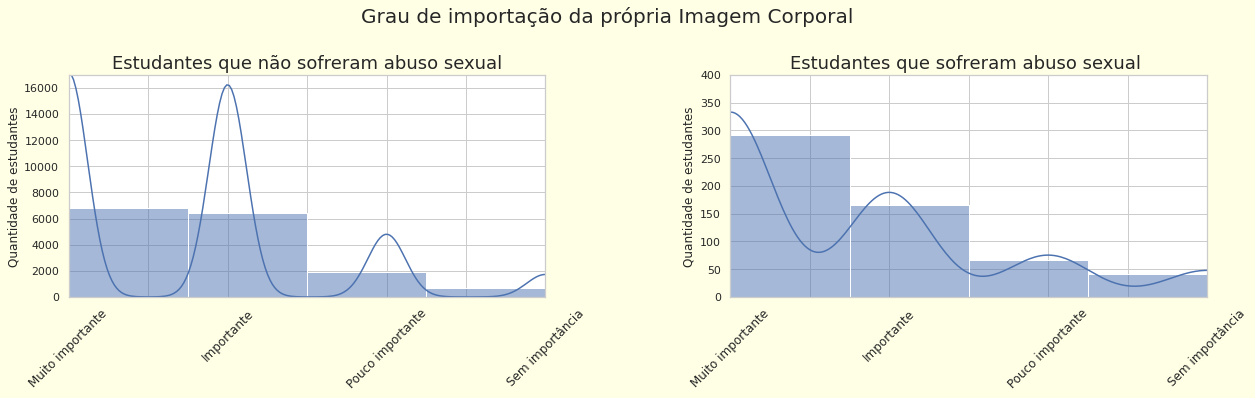

In [136]:
# Criando os datasets que serão plotados
to_plot_noabused = no_sex_abuse_students.query("VB11006 != 99")
to_plot_abused = students_data.query("VB11006 != 99")

#lists '
dictList =['Muito importante',
           ' ',
          'Importante',
           ' ',
          'Pouco importante',
           ' ',
          'Sem importância'] 

# Plotanto os gráficos
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
plt.suptitle('Grau de importação da própria Imagem Corporal',fontsize=20, y=1)

ax1 = sns.histplot(data = to_plot_noabused, 
                   x = 'VB11006', 
                   bins = 4,
                   kde = True)

ax1.figure.set_size_inches(18, 6)
ax1.set_title('Estudantes que não sofreram abuso sexual', fontsize=18)

# Nomeando os eixos para estudantes não abusados sexualmente 
ax1.set_xlabel('')
ax1.set_ylabel('Quantidade de estudantes')
ax1.grid(which='both', linestyle='-')
ax1.figure.set_facecolor('#ffffe6')
ax1.axes.set_ylim(0,17000)
ax1.set_xticklabels(dictList, rotation='45', fontsize=12)

plt.xlim(1,4)
plt.tight_layout(pad=4, h_pad=4, w_pad=12)

# Segundo gráfico - para estudantes abusados sexualmente
plt.subplot(1,2,2)
ax2 = sns.histplot(data = to_plot_abused, 
                   x = 'VB11006', 
                   bins=4,  
                   kde = True)

ax2.figure.set_size_inches(18, 6)
ax2.set_title('Estudantes que sofreram abuso sexual ', fontsize=18)

# Nomeando os eixos para estudantes não abusados sexualmente 
ax2.set_xlabel('')
ax2.set_ylabel('Quantidade de estudantes')

ax2.figure.set_facecolor('#ffffe6')

ax2.grid(which='both', linestyle='-')
ax2.axes.set_ylim(0,400)
ax2.set_xticklabels(dictList, rotation='45', fontsize=12)

plt.xlim(1,4)

plt.show()

**A hipótese se confirma também nestes gráfico onde nota-se novamente uma proporção maior de estudantes que consideram a imagem corporal *muito importante* na amostra de estudantes que sofreram abuso sexual**

#### Há similaridades quanto a idade do primeiro contato com drogas entre estudantes que sofreram abuso sexual e os que não sofreram?

In [137]:
# Criando tabela de frequencia para estudantes não abusados para a pergunta 
# VB11006 - Que idade você tinha quando usou droga como maconha, cocaína, crack, 
#cola, loló, lança-perfume, ecstasy, oxy ou outra, pela primeira vez?
answers = dictionary_by_id['VB06002']['Respostas']
no_abused_frequency_dist_drugs  = frequency_table(no_sex_abuse_students, 'VB06002', 'Primeiro contato com drogas', answers )

# Criando tabela de frequencia para estudantes abusados para a pergunta 
# VB11006 - Que idade você tinha quando usou droga como maconha, cocaína, crack, 
# cola, loló, lança-perfume, ecstasy, oxy ou outra, pela primeira vez?
answers = dictionary_by_id['VB06002']['Respostas']
abused_frequency_dist_drugs  = frequency_table(students_data, 'VB06002', 'Primeiro contato com drogas', answers )

In [138]:
table_to_plot = styled_table(no_abused_frequency_dist_drugs,abused_frequency_dist_drugs)
HTML(table_to_plot)

Primeiro contato com drogas,Frequency,Rate
Pulo no questionário,14714,92.04
15 anos,300,1.88
14 anos,268,1.68
13 anos,217,1.36
16 anos,180,1.13
12 anos,99,0.62
17 anos,88,0.55
11 anos,36,0.23
18 anos ou mais,29,0.18
7 anos ou menos,21,0.13


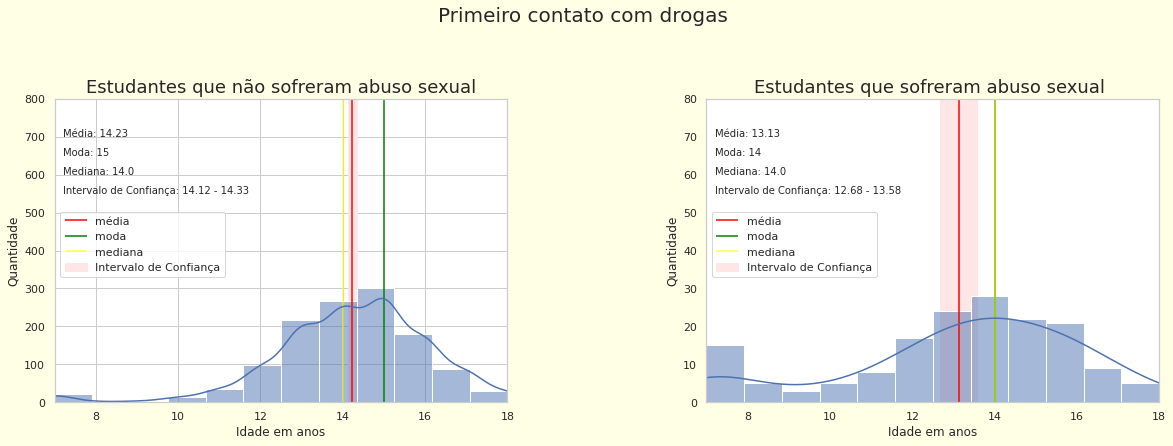

In [139]:
# Criando os datasets que serão plotados
to_plot_noabused = no_sex_abuse_students.query("VB06002 != -1 & VB06002 != 99")
to_plot_abused = students_data.query("VB06002 != -1 & VB06002 != 99")

# Calcula média, moda e mediana para estudantes não abusados sexualmente
height_mean1   = to_plot_noabused['VB06002'].mean()
height_mode1   = to_plot_noabused['VB06002'].mode()[0]
height_median1 = to_plot_noabused['VB06002'].median()

# Calcula média, moda e mediana para estudantes abusados sexualmente
height_mean2   = to_plot_abused['VB06002'].mean()
height_mode2   = to_plot_abused['VB06002'].mode()[0]
height_median2 = to_plot_abused['VB06002'].median()

# Intervalo de confiânça para estudantes não abusados sexualmente 
conf_inti_ini1 = zconfint(to_plot_noabused["VB06002"])[0] 
conf_inti_end1 = zconfint(to_plot_noabused["VB06002"])[1] 

# Intervalo de confiânça para estudantes abusados sexualmente
conf_inti_ini2 = zconfint(to_plot_abused["VB06002"])[0] 
conf_inti_end2 = zconfint(to_plot_abused["VB06002"])[1] 

# Plotanto os gráficos
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.suptitle('Primeiro contato com drogas',fontsize=20, y=1)

ax1 = sns.histplot(data = to_plot_noabused, 
                   x = 'VB06002', 
                   bins=12,  
                   kde = True)

ax1.figure.set_size_inches(18, 7)
ax1.set_title('Estudantes que não sofreram abuso sexual', fontsize=18)

# Marcando com linhas verticais no gráfico para estudantes não abusados sexualmente 
ax1.vlines(height_mean1, ymin=0, ymax = 800, color='red', label='média')
ax1.vlines(height_mode1, ymin=0, ymax = 800, color='green', label='moda')
ax1.vlines(height_median1, ymin=0, ymax = 800, color='yellow', label='mediana', alpha=0.7)

# Anotações dos valores para estudantes não abusados sexualmente 
ax1.annotate(f'Média: {round(height_mean1,2)}', xy=(7.2,700), fontsize=10)
ax1.annotate(f'Moda: {round(height_mode1,2)}', xy=(7.2,650), fontsize=10)
ax1.annotate(f'Mediana: {round(height_median1,2)}', xy=(7.2,600), fontsize=10)
ax1.annotate(f'Intervalo de Confiança: {round(conf_inti_ini1,2)} - {round(conf_inti_end1,2)}', xy=(7.2,550), fontsize=10)

# Nomeando os eixos para estudantes não abusados sexualmente 
ax1.set_xlabel('Idade em anos')
ax1.set_ylabel('Quantidade')
ax1.grid(which='both', linestyle='-')

# Marcando com linhas intervalos de confiança para estudantes não abusados sexualmente 
ax1.fill_betweenx(y=[0,900], 
                 x1=conf_inti_ini1,
                 x2=conf_inti_end1,
                 color='#ffe6e6', label='Intervalo de Confiança')
ax1.figure.set_facecolor('#ffffe6')

ax1.legend(loc='center left', bbox_to_anchor=((0.0,0.52)))
ax1.axes.set_ylim(0,800)
plt.xlim(7,18)
plt.tight_layout(pad=6, h_pad=4, w_pad=16)

# Segundo gráfico - para estudantes abusados sexualmente
plt.subplot(1,2,2)
ax2 = sns.histplot(data = to_plot_abused, 
                   x = 'VB06002', bins=12,  
                   kde = True)

ax2.figure.set_size_inches(18, 7)
ax2.set_title('Estudantes que sofreram abuso sexual ', fontsize=18)

# Marcando com linhas verticais no gráfico para estudantes não abusados sexualmente 
ax2.vlines(height_mean2, ymin=0, ymax = 80, color='red', label='média')
ax2.vlines(height_mode2, ymin=0, ymax = 80, color='green', label='moda')
ax2.vlines(height_median2, ymin=0, ymax = 80, color='yellow', label='mediana', alpha=0.7)

# Anotações dos valores para estudantes não abusados sexualmente 
ax2.annotate(f'Média: {round(height_mean2,2)}', xy=(7.2,70), fontsize=10)
ax2.annotate(f'Moda: {round(height_mode2,2)}', xy=(7.2,65), fontsize=10)
ax2.annotate(f'Mediana: {round(height_median2,2)}', xy=(7.2,60), fontsize=10)
ax2.annotate(f'Intervalo de Confiança: {round(conf_inti_ini2,2)} - {round(conf_inti_end2,2)}', xy=(7.2,55), fontsize=10)

# Nomeando os eixos para estudantes não abusados sexualmente 
ax2.set_xlabel('Idade em anos')
ax2.set_ylabel('Quantidade')

# Marcando com linhas intervalos de confiança para estudantes não abusados sexualmente 
ax2.fill_betweenx(y=[0,900], 
                 x1=conf_inti_ini2,
                 x2=conf_inti_end2,
                 color='#ffe6e6', label='Intervalo de Confiança')
ax2.figure.set_facecolor('#ffffe6')

ax2.grid()

ax2.legend(loc='center left', bbox_to_anchor=((0.0,0.52)))
ax2.axes.set_ylim(0,80)
plt.xlim(7,18)

plt.show()

**Os estudantes que sofreram abuso sexual tiveram contato mais cedo - por volta dos 13 anos - com drogas do que os estudantes que não foram vítimas de abuso onde o primeiro contato com drogas foi por volta dos 14 anos.**

#### Há similaridades quanto ao uso de drogas entre estudantes que sofreram abuso sexual e os que não sofreram?

In [140]:
# Criando tabela de frequencia para estudantes não abusados para a pergunta VB06003A - NOS ÚLTIMOS 30 DIAS, quantos dias você 
# usou droga como maconha, cocaína, crack, cola, loló, lança-perfume, ecstasy, oxy, etc?
answers = dictionary_by_id['VB06003A']['Respostas']
no_abused_frequency_dist_drugs  = frequency_table(no_sex_abuse_students, 'VB06003A', 'Últimos 30 dias - uso drogas', answers )

# Criando tabela de frequencia para estudantes abusados para a pergunta VB06003A - NOS ÚLTIMOS 30 DIAS, quantos dias você 
# usou droga como maconha, cocaína, crack, cola, loló, lança-perfume, ecstasy, oxy, etc?
answers = dictionary_by_id['VB06003A']['Respostas']
abused_frequency_dist_drugs  = frequency_table(students_data, 'VB06003A', 'Últimos 30 dias - uso drogas', answers )


In [141]:
table_to_plot = styled_table(no_abused_frequency_dist_drugs,abused_frequency_dist_drugs)
HTML(table_to_plot)

Últimos 30 dias - uso drogas,Frequency,Rate
Pulo no questionário,14714,92.04
Nenhum dia nos últimos 30 dias (0 dia),720,4.50
1 ou 2 dias nos últimos 30 dias,282,1.76
10 ou mais dias nos últimos 30 dias,127,0.79
3 a 5 dias nos últimos 30 dias,85,0.53
6 a 9 dias nos últimos 30 dias,53,0.33
Não informado,6,0.04
Últimos 30 dias - uso drogas,Frequency,Rate
Pulo no questionário,403,70.83
Nenhum dia nos últimos 30 dias (0 dia),77,13.53


Plotando o gráfico e desconsiderando as respostas **"Não informado", "Pulo no questionário" e "Nenhum dia"**

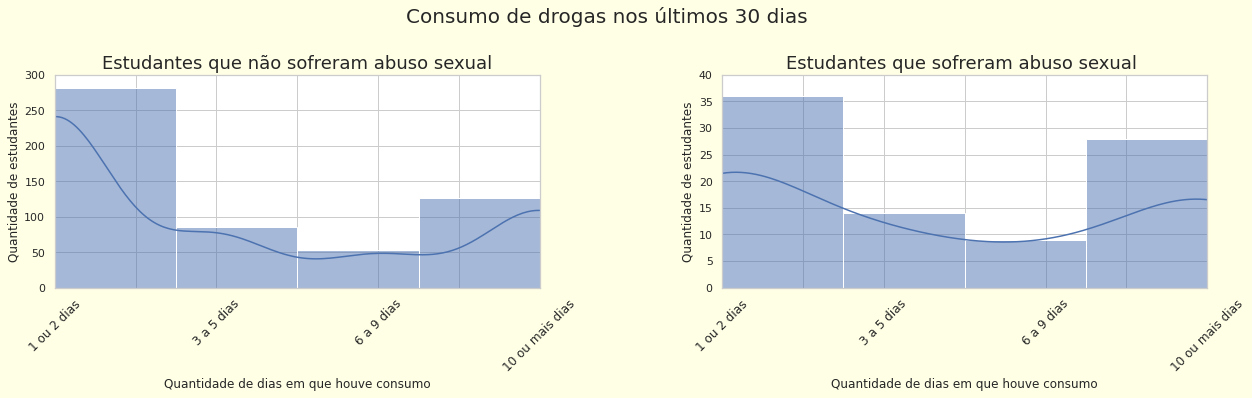

In [142]:
# Criando os datasets que serão plotados
to_plot_noabused = no_sex_abuse_students.query("VB06003A != -1 & VB06003A != 99 & VB06003A != 1")
to_plot_abused = students_data.query("VB06003A != -1 & VB06003A != 99 & VB06003A != 1")

#lists '
dictList =['1 ou 2 dias',
           ' ',
          '3 a 5 dias',
           ' ',
          '6 a 9 dias',
           ' ',
          '10 ou mais dias'] 

# Plotanto os gráficos
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
plt.suptitle('Consumo de drogas nos últimos 30 dias',fontsize=20, y=1)

ax1 = sns.histplot(data = to_plot_noabused, 
                   x = 'VB06003A', 
                   bins=4,  
                   kde = True)

ax1.figure.set_size_inches(18, 6)
ax1.set_title('Estudantes que não sofreram abuso sexual', fontsize=18)

# Nomeando os eixos para estudantes não abusados sexualmente 
ax1.set_xlabel('Quantidade de dias em que houve consumo')
ax1.set_ylabel('Quantidade de estudantes')
ax1.grid(which='both', linestyle='-')

ax1.figure.set_facecolor('#ffffe6')

ax1.axes.set_ylim(0,300)

ax1.set_xticklabels(dictList, rotation='45', fontsize=12)

plt.xlim(2,5)
plt.tight_layout(pad=4, h_pad=4, w_pad=12)

# Segundo gráfico - para estudantes abusados sexualmente
plt.subplot(1,2,2)
ax2 = sns.histplot(data = to_plot_abused, 
                   x = 'VB06003A', 
                   bins=4,  
                   kde = True)

ax2.figure.set_size_inches(18, 6)
ax2.set_title('Estudantes que sofreram abuso sexual ', fontsize=18)

# Nomeando os eixos para estudantes não abusados sexualmente 
ax2.set_xlabel('Quantidade de dias em que houve consumo')
ax2.set_ylabel('Quantidade de estudantes')

ax2.figure.set_facecolor('#ffffe6')

ax2.grid(which='both', linestyle='-')
ax2.axes.set_ylim(0,40)
ax2.set_xticklabels(dictList, rotation='45', fontsize=12)

plt.xlim(2,5)

plt.show()

**Porporcionamente o consumo de drogas é bem superior nos últimos 30 dias, em todas as faixas de dias apurados, para estudantes que sofreram abuso sexual**

#### Há similaridades quanto a idade do primeiro contato com bebida alcoólica entre estudantes que sofreram abuso sexual e os que não sofreram?

In [143]:
# Criando tabela de frequencia para estudantes não abusados para a pergunta VB05003 - 
# Que idade você tinha quando tomou a primeira dose de bebida alcoólica? 
# (Uma dose equivale a uma lata de cerveja ou uma taça de vinho ou uma dose de cachaça ou uísque etc)
answers = dictionary_by_id['VB05003']['Respostas']
no_abused_frequency_dist_alc  = frequency_table(no_sex_abuse_students, 'VB05003', 'Primeiro contato bebida alcoólica', answers )

# Criando tabela de frequencia para estudantes abusados para a pergunta  - 
# Que idade você tinha quando tomou a primeira dose de bebida alcoólica? 
# (Uma dose equivale a uma lata de cerveja ou uma taça de vinho ou uma dose de cachaça ou uísque etc)
answers = dictionary_by_id['VB05003']['Respostas']
abused_frequency_dist_alc  = frequency_table(students_data, 'VB05003', 'Primeiro contato bebida alcoólica', answers )


In [144]:
table_to_plot = styled_table(no_abused_frequency_dist_alc,abused_frequency_dist_alc)
HTML(table_to_plot)

Primeiro contato bebida alcoólica,Frequency,Rate
Pulo no questionário,4706,29.44
Nunca tomei bebida alcoólica,4464,27.92
14 anos,1437,8.99
13 anos,1238,7.74
15 anos,1205,7.54
12 anos,936,5.85
16 anos,487,3.05
11 anos,344,2.15
10 anos,332,2.08
17 anos,251,1.57


Plotando um gráfico e desconsiderando as respostas **"Não informado", "Pulo no questionário" e "Nunca tomei bebida alcoólica**

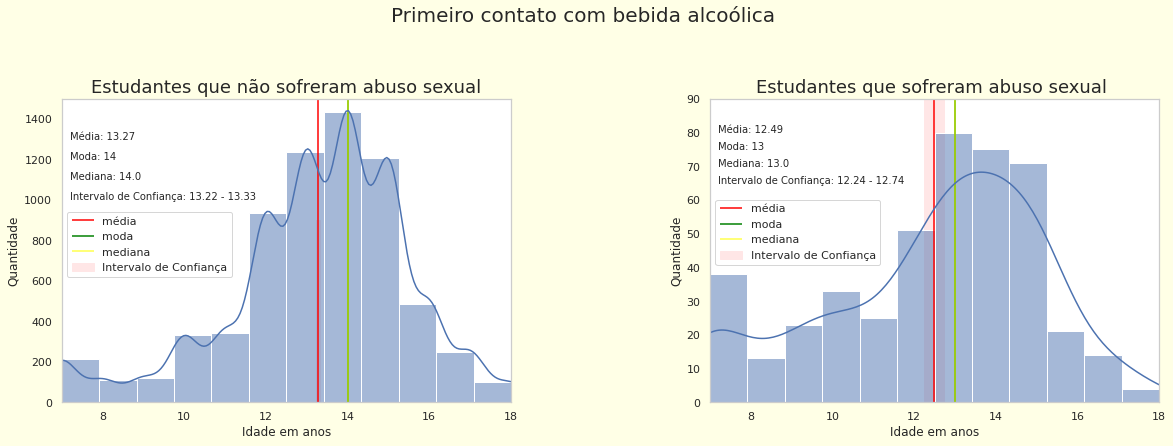

In [145]:
# Criando os datasets que serão plotados
to_plot_noabused = no_sex_abuse_students.query("VB05003 != -1 & VB05003 != 99 & VB05003 != 1")
to_plot_abused = students_data.query("VB05003 != -1 & VB05003 != 99 & VB05003 != 1")

# Calcula média, moda e mediana para estudantes não abusados sexualmente
height_mean1   = to_plot_noabused['VB05003'].mean()
height_mode1   = to_plot_noabused['VB05003'].mode()[0]
height_median1 = to_plot_noabused['VB05003'].median()

# Calcula média, moda e mediana para estudantes abusados sexualmente
height_mean2   = to_plot_abused['VB05003'].mean()
height_mode2   = to_plot_abused['VB05003'].mode()[0]
height_median2 = to_plot_abused['VB05003'].median()

# Intervalo de confiânça para estudantes não abusados sexualmente 
conf_inti_ini1 = zconfint(to_plot_noabused["VB05003"])[0] 
conf_inti_end1 = zconfint(to_plot_noabused["VB05003"])[1] 

# Intervalo de confiânça para estudantes abusados sexualmente
conf_inti_ini2 = zconfint(to_plot_abused["VB05003"])[0] 
conf_inti_end2 = zconfint(to_plot_abused["VB05003"])[1] 

# Plotanto os gráficos
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.suptitle('Primeiro contato com bebida alcoólica',fontsize=20, y=1)

ax1 = sns.histplot(data = to_plot_noabused, 
                   x='VB05003', 
                   bins=12,  
                   kde=True)

ax1.figure.set_size_inches(18, 7)
ax1.set_title('Estudantes que não sofreram abuso sexual', fontsize=18)

# Marcando com linhas verticais no gráfico para estudantes não abusados sexualmente 
ax1.vlines(height_mean1, ymin=0, ymax = 1500, color='red', label='média')
ax1.vlines(height_mode1, ymin=0, ymax = 1500, color='green', label='moda')
ax1.vlines(height_median1, ymin=0, ymax = 1500, color='yellow', label='mediana', alpha=0.7)

# Anotações dos valores para estudantes não abusados sexualmente 
ax1.annotate(f'Média: {round(height_mean1,2)}', xy=(7.2,1300), fontsize=10)
ax1.annotate(f'Moda: {round(height_mode1,2)}', xy=(7.2,1200), fontsize=10)
ax1.annotate(f'Mediana: {round(height_median1,2)}', xy=(7.2,1100), fontsize=10)
ax1.annotate(f'Intervalo de Confiança: {round(conf_inti_ini1,2)} - {round(conf_inti_end1,2)}', xy=(7.2,1000), fontsize=10)

# Nomeando os eixos para estudantes não abusados sexualmente 
ax1.set_xlabel('Idade em anos')
ax1.set_ylabel('Quantidade')
ax1.grid()

# Marcando com linhas intervalos de confiança para estudantes não abusados sexualmente 
ax1.fill_betweenx(y=[0,900], 
                 x1=conf_inti_ini1,
                 x2=conf_inti_end1,
                 color='#ffe6e6', label='Intervalo de Confiança')
ax1.figure.set_facecolor('#ffffe6')

ax1.legend(loc='center left', bbox_to_anchor=((0.0,0.52)))
ax1.axes.set_ylim(0,1500)
plt.xlim(7,18)
plt.tight_layout(pad=6, h_pad=4, w_pad=16)

# Segundo gráfico - para estudantes abusados sexualmente
plt.subplot(1,2,2)
ax2 = sns.histplot(data = to_plot_abused, 
                   x='VB05003', 
                   bins=12,  
                   kde=True)

ax2.figure.set_size_inches(18, 7)
ax2.set_title('Estudantes que sofreram abuso sexual ', fontsize=18)

# Marcando com linhas verticais no gráfico para estudantes não abusados sexualmente 
ax2.vlines(height_mean2, ymin=0, ymax = 90, color='red', label='média')
ax2.vlines(height_mode2, ymin=0, ymax = 90, color='green', label='moda')
ax2.vlines(height_median2, ymin=0, ymax = 90, color='yellow', label='mediana', alpha=0.7)

# Anotações dos valores para estudantes não abusados sexualmente 
ax2.annotate(f'Média: {round(height_mean2,2)}', xy=(7.2,80), fontsize=10)
ax2.annotate(f'Moda: {round(height_mode2,2)}', xy=(7.2,75), fontsize=10)
ax2.annotate(f'Mediana: {round(height_median2,2)}', xy=(7.2,70), fontsize=10)
ax2.annotate(f'Intervalo de Confiança: {round(conf_inti_ini2,2)} - {round(conf_inti_end2,2)}', xy=(7.2,65), fontsize=10)

# Nomeando os eixos para estudantes não abusados sexualmente 
ax2.set_xlabel('Idade em anos')
ax2.set_ylabel('Quantidade')

# Marcando com linhas intervalos de confiança para estudantes não abusados sexualmente 
ax2.fill_betweenx(y=[0,90], 
                 x1=conf_inti_ini2,
                 x2=conf_inti_end2,
                 color='#ffe6e6', label='Intervalo de Confiança')
ax2.figure.set_facecolor('#ffffe6')

ax2.grid()

ax2.legend(loc='center left', bbox_to_anchor=((0.0,0.56)))
ax2.axes.set_ylim(0,90)
plt.xlim(7,18)

plt.show()

**Há uma maior frequência no início do contato com bebida alcoólica, por volta dos 13 anos, em estudantes que sofreram abuso sexual. Para os estudantes que não sofreram abuso sexual a maior frequência para o contato com bebida alcoólica é a partir dos 14 anos de idade.**

#### Há similaridades quanto ao consumo frequente de bebidas alcoólicas entre estudantes que sofreram abuso sexual e os que não sofreram?

In [146]:
# Criando tabela de frequencia para estudantes não abusados para a pergunta VB05004 - 
# NOS ÚLTIMOS 30 DIAS, em quantos dias você tomou pelo menos um copo ou uma dose de bebida alcoólica? 
# (Uma dose equivale a uma lata de cerveja ou uma taça de vinho ou uma dose de cachaça ou uísque etc) 

answers = dictionary_by_id['VB05004']['Respostas']
no_abused_frequency_dist_alc_use  = frequency_table(no_sex_abuse_students, 'VB05004', 'Uso de bebida alcoólica', answers )

# Criando tabela de frequencia para estudantes abusados para a pergunta  - 
# NOS ÚLTIMOS 30 DIAS, em quantos dias você tomou pelo menos um copo ou uma dose de bebida alcoólica? 
# (Uma dose equivale a uma lata de cerveja ou uma taça de vinho ou uma dose de cachaça ou uísque etc) 

answers = dictionary_by_id['VB05004']['Respostas']
abused_frequency_dist_alc_use  = frequency_table(students_data, 'VB05004', 'Uso de bebida alcoólica', answers )

In [147]:
table_to_plot = styled_table(no_abused_frequency_dist_alc_use,abused_frequency_dist_alc_use)
HTML(table_to_plot)

Uso de bebida alcoólica,Frequency,Rate
Pulo no questionário,9113,57.00
Nenhum dia nos últimos 30 dias (0 dia),3631,22.71
1 ou 2 dias nos últimos 30 dias,1828,11.43
3 a 5 dias nos últimos 30 dias,654,4.09
6 a 9 dias nos últimos 30 dias,352,2.20
10 a 19 dias nos últimos 30 dias,241,1.51
20 a 29 dias nos últimos 30 dias,82,0.51
Todos os dias nos últimos 30 dias,74,0.46
Não informado,12,0.08
Uso de bebida alcoólica,Frequency,Rate


Plotando um gráfico e desconsiderando as respostas **"Não informado", "Pulo no questionário" e "Nenhum dia nos últimos 30 dias**

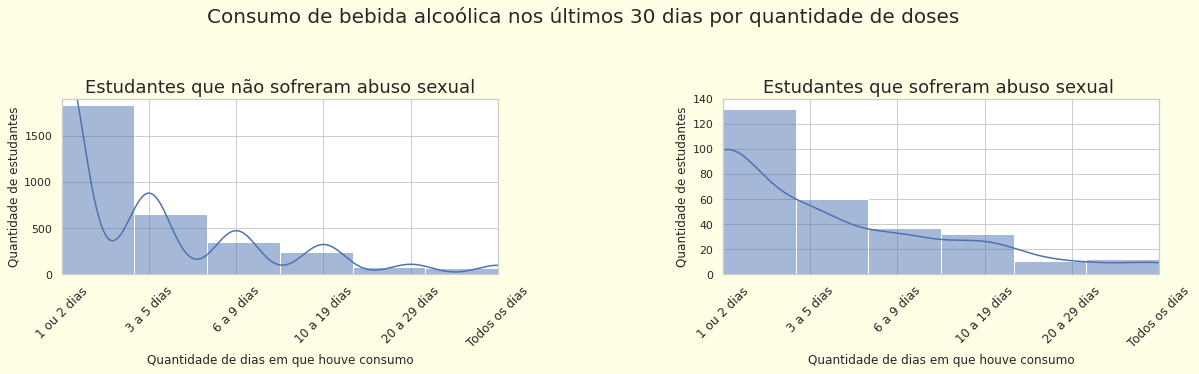

In [148]:
# Criando os datasets que serão plotados
to_plot_noabused = no_sex_abuse_students.query("VB05004 != -1 & VB05004 != 99 & VB05004 != 1")
to_plot_abused = students_data.query("VB05004 != -1 & VB05004 != 99 & VB05004 != 1")

#lists '
dictList =['1 ou 2 dias',
          '3 a 5 dias',
          '6 a 9 dias',
          '10 a 19 dias',
          '20 a 29 dias',
          'Todos os dias'] 

# Plotanto os gráficos
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
plt.suptitle('Consumo de bebida alcoólica nos últimos 30 dias por quantidade de doses',fontsize=20, y=1)

ax1 = sns.histplot(data = to_plot_noabused, 
                   x='VB05004', 
                   bins=6,  
                   kde=True)

ax1.figure.set_size_inches(18, 6)
ax1.set_title('Estudantes que não sofreram abuso sexual', fontsize=18)

# Nomeando os eixos para estudantes não abusados sexualmente 
ax1.set_xlabel('Quantidade de dias em que houve consumo')
ax1.set_ylabel('Quantidade de estudantes')
ax1.grid(which='both', linestyle='-')

ax1.figure.set_facecolor('#ffffe6')

ax1.axes.set_ylim(0,1900)

ax1.set_xticklabels(dictList, rotation='45', fontsize=12)

plt.xlim(2,7)
plt.tight_layout(pad=6, h_pad=4, w_pad=16)

# Segundo gráfico - para estudantes abusados sexualmente
plt.subplot(1,2,2)
ax2 = sns.histplot(data = to_plot_abused, 
                   x='VB05004', 
                   bins=6,  
                   kde=True)

ax2.figure.set_size_inches(18, 6)
ax2.set_title('Estudantes que sofreram abuso sexual ', fontsize=18)

# Nomeando os eixos para estudantes não abusados sexualmente 
ax2.set_xlabel('Quantidade de dias em que houve consumo')
ax2.set_ylabel('Quantidade de estudantes')

ax2.grid(which='both', linestyle='-')

ax2.axes.set_ylim(0,140)
ax2.set_xticklabels(dictList, rotation='45', fontsize=12)

plt.xlim(2,7)

plt.show()

**Proporcionalmente há um maior número de dias onde houve o consumo de bebidas alcoólicas para estudantes que sofreram abusos sexuais.**

#### Há diferenças, quanto ao primeiro contato com cigarro, entre estudantes que sofreram abusos sexuais e os que não sofreram abusos?

In [149]:
# Criando tabela de frequencia para estudantes não abusados para a pergunta 
# VB04002 - Que idade você tinha quando experimentou fumar cigarro pela primeira vez?
answers = dictionary_by_id['VB04002']['Respostas']
no_abused_frequency_smoking  = frequency_table(no_sex_abuse_students, 'VB04002', 'Primeira vez que fumou', answers )

# Criando tabela de frequencia para estudantes abusados para a pergunta 
# VB04002 -Que idade você tinha quando experimentou fumar cigarro pela primeira vez?
answers = dictionary_by_id['VB04002']['Respostas']
abused_frequency_smoking  = frequency_table(students_data, 'VB04002', 'Primeira vez que fumou', answers )

In [150]:
# Plotando as tabelas de frequencia
table_to_plot = styled_table(no_abused_frequency_smoking,abused_frequency_smoking)
HTML(table_to_plot)

Primeira vez que fumou,Frequency,Rate
Pulo no questionário,13435,84.04
14 anos,444,2.78
15 anos,434,2.71
13 anos,429,2.68
12 anos,345,2.16
16 anos,204,1.28
11 anos,144,0.90
10 anos,141,0.88
7 anos de idade ou menos,114,0.71
17 anos,108,0.68


Plotando um gráfico e desconsiderando as respostas **"Não informado" e "Pulo no questionário"**

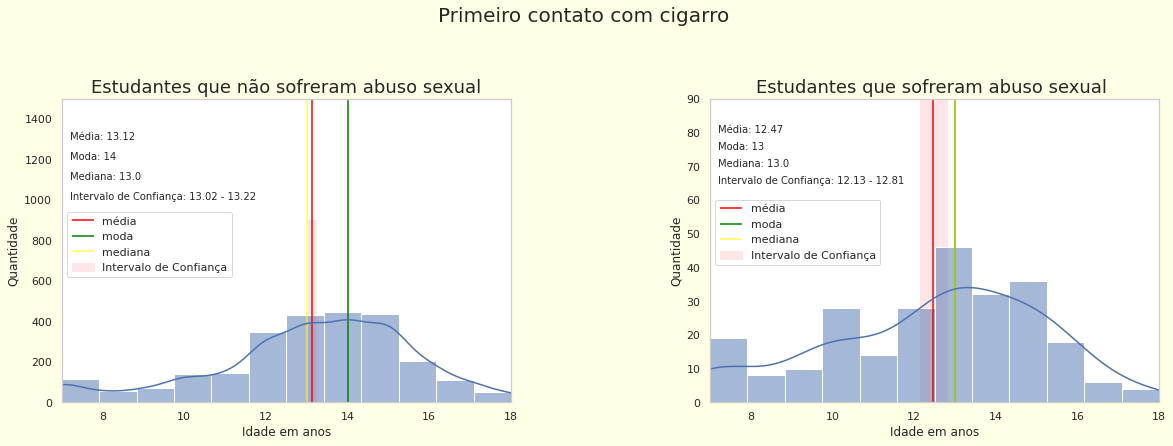

In [151]:
# Criando os datasets que serão plotados
to_plot_noabused = no_sex_abuse_students.query("VB04002 != -1 & VB04002 != 99 & VB04002 != 1")
to_plot_abused = students_data.query("VB04002 != -1 & VB04002 != 99 & VB04002 != 1")

# Calcula média, moda e mediana para estudantes não abusados sexualmente
height_mean1   = to_plot_noabused['VB04002'].mean()
height_mode1   = to_plot_noabused['VB04002'].mode()[0]
height_median1 = to_plot_noabused['VB04002'].median()

# Calcula média, moda e mediana para estudantes abusados sexualmente
height_mean2   = to_plot_abused['VB04002'].mean()
height_mode2   = to_plot_abused['VB04002'].mode()[0]
height_median2 = to_plot_abused['VB04002'].median()

# Intervalo de confiânça para estudantes não abusados sexualmente 
conf_inti_ini1 = zconfint(to_plot_noabused["VB04002"])[0] 
conf_inti_end1 = zconfint(to_plot_noabused["VB04002"])[1] 

# Intervalo de confiânça para estudantes abusados sexualmente
conf_inti_ini2 = zconfint(to_plot_abused["VB04002"])[0] 
conf_inti_end2 = zconfint(to_plot_abused["VB04002"])[1] 

# Plotanto os gráficos
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.suptitle('Primeiro contato com cigarro',fontsize=20, y=1)

ax1 = sns.histplot(data = to_plot_noabused, 
                   x='VB04002', 
                   bins=12,  
                   kde=True)

ax1.figure.set_size_inches(18, 7)
ax1.set_title('Estudantes que não sofreram abuso sexual', fontsize=18)

# Marcando com linhas verticais no gráfico para estudantes não abusados sexualmente 
ax1.vlines(height_mean1, ymin=0, ymax = 1500, color='red', label='média')
ax1.vlines(height_mode1, ymin=0, ymax = 1500, color='green', label='moda')
ax1.vlines(height_median1, ymin=0, ymax = 1500, color='yellow', label='mediana', alpha=0.7)

# Anotações dos valores para estudantes não abusados sexualmente 
ax1.annotate(f'Média: {round(height_mean1,2)}', xy=(7.2,1300), fontsize=10)
ax1.annotate(f'Moda: {round(height_mode1,2)}', xy=(7.2,1200), fontsize=10)
ax1.annotate(f'Mediana: {round(height_median1,2)}', xy=(7.2,1100), fontsize=10)
ax1.annotate(f'Intervalo de Confiança: {round(conf_inti_ini1,2)} - {round(conf_inti_end1,2)}', xy=(7.2,1000), fontsize=10)

# Nomeando os eixos para estudantes não abusados sexualmente 
ax1.set_xlabel('Idade em anos')
ax1.set_ylabel('Quantidade')
ax1.grid()

# Marcando com linhas intervalos de confiança para estudantes não abusados sexualmente 
ax1.fill_betweenx(y=[0,900], 
                 x1=conf_inti_ini1,
                 x2=conf_inti_end1,
                 color='#ffe6e6', label='Intervalo de Confiança')
ax1.figure.set_facecolor('#ffffe6')

ax1.legend(loc='center left', bbox_to_anchor=((0.0,0.52)))
ax1.axes.set_ylim(0,1500)
plt.xlim(7,18)
plt.tight_layout(pad=6, h_pad=4, w_pad=16)

# Segundo gráfico - para estudantes abusados sexualmente
plt.subplot(1,2,2)
ax2 = sns.histplot(data = to_plot_abused, 
                   x='VB04002', 
                   bins=12,  
                   kde=True)

ax2.figure.set_size_inches(18, 7)
ax2.set_title('Estudantes que sofreram abuso sexual ', fontsize=18)

# Marcando com linhas verticais no gráfico para estudantes não abusados sexualmente 
ax2.vlines(height_mean2, ymin=0, ymax = 90, color='red', label='média')
ax2.vlines(height_mode2, ymin=0, ymax = 90, color='green', label='moda')
ax2.vlines(height_median2, ymin=0, ymax = 90, color='yellow', label='mediana', alpha=0.7)

# Anotações dos valores para estudantes não abusados sexualmente 
ax2.annotate(f'Média: {round(height_mean2,2)}', xy=(7.2,80), fontsize=10)
ax2.annotate(f'Moda: {round(height_mode2,2)}', xy=(7.2,75), fontsize=10)
ax2.annotate(f'Mediana: {round(height_median2,2)}', xy=(7.2,70), fontsize=10)
ax2.annotate(f'Intervalo de Confiança: {round(conf_inti_ini2,2)} - {round(conf_inti_end2,2)}', xy=(7.2,65), fontsize=10)

# Nomeando os eixos para estudantes não abusados sexualmente 
ax2.set_xlabel('Idade em anos')
ax2.set_ylabel('Quantidade')

# Marcando com linhas intervalos de confiança para estudantes não abusados sexualmente 
ax2.fill_betweenx(y=[0,90], 
                 x1=conf_inti_ini2,
                 x2=conf_inti_end2,
                 color='#ffe6e6', label='Intervalo de Confiança')
ax2.figure.set_facecolor('#ffffe6')

ax2.grid()

ax2.legend(loc='center left', bbox_to_anchor=((0.0,0.56)))
ax2.axes.set_ylim(0,90)
plt.xlim(7,18)

plt.show()

**Estudantes que sofreram abuso sexual tiveram contato com cigarro, mais cedo e com maior frequência de incidência, em todas as faixa etárias da amostra analisada do que estudantes que não sofreram abusos sexuais.**

#### Há semelhanças na quantidade de dias onde houve consumo de cigarros de tabaco entre estudantes que sofreram abuso sexual e a amostra de estudantes que não sofreu?

In [152]:
# Criando tabela de frequencia para estudantes não abusados para a pergunta VB04003 - 
# NOS ÚLTIMOS 30 DIAS, em quantos dias você fumou cigarros?

answers = dictionary_by_id['VB04003']['Respostas']
no_abused_frequency_dist_tabacco  = frequency_table(no_sex_abuse_students, 'VB04003', 'Dias em que fumou Cigarros', answers )

# Criando tabela de frequencia para estudantes abusados para a pergunta  - 
# NOS ÚLTIMOS 30 DIAS, em quantos dias você fumou cigarros?

answers = dictionary_by_id['VB04003']['Respostas']
abused_frequency_dist_tabacco  = frequency_table(students_data, 'VB04003', 'Dias em que fumou Cigarros', answers )

In [153]:
table_to_plot = styled_table(no_abused_frequency_dist_tabacco, abused_frequency_dist_tabacco)
HTML(table_to_plot)

Dias em que fumou Cigarros,Frequency,Rate
Pulo no questionário,13435,84.04
Nenhum dia nos últimos 30 dias (0 dia),1842,11.52
1 ou 2 dias nos últimos 30 dias,366,2.29
3 a 5 dias nos últimos 30 dias,112,0.70
Todos os dias nos últimos 30 dias,99,0.62
6 a 9 dias nos últimos 30 dias,56,0.35
10 a 19 dias nos últimos 30 dias,40,0.25
20 a 29 dias nos últimos 30 dias,32,0.20
Não informado,5,0.03
Dias em que fumou Cigarros,Frequency,Rate


Plotando um gráfico e desconsiderando as respostas **"Não informado", "Pulo no questionário" e "Nenhum"** para realizar a comparação da amostra de fumantes.

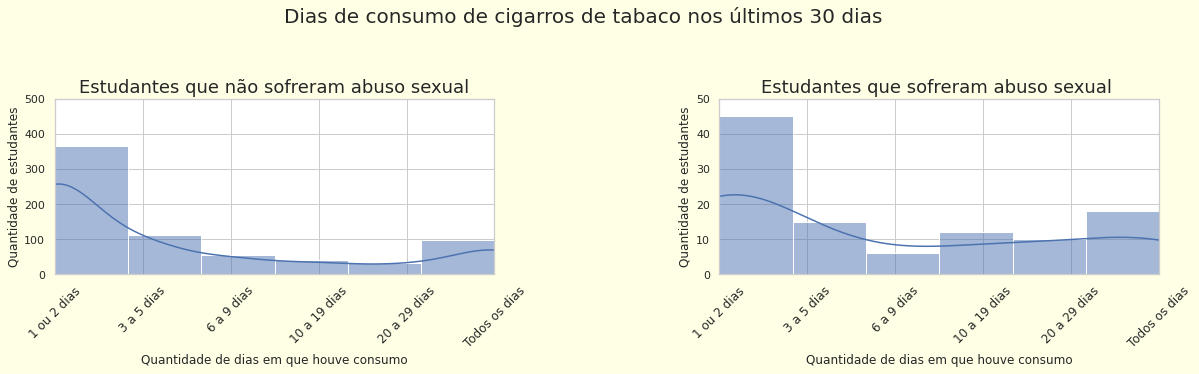

In [154]:
# Criando os datasets que serão plotados
to_plot_noabused = no_sex_abuse_students.query("VB04003 != -1 & VB04003 != 99 & VB04003 != 1")
to_plot_abused = students_data.query("VB04003 != -1 & VB04003 != 99 & VB04003 != 1")

#lists '
dictList =['1 ou 2 dias',
          '3 a 5 dias',
          '6 a 9 dias',
          '10 a 19 dias',
          '20 a 29 dias',
          'Todos os dias'] 

# Plotanto os gráficos
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
plt.suptitle('Dias de consumo de cigarros de tabaco nos últimos 30 dias',fontsize=20, y=1)

ax1 = sns.histplot(data = to_plot_noabused, 
                   x='VB04003', 
                   bins=6,  
                   kde=True)

ax1.figure.set_size_inches(18, 6)
ax1.set_title('Estudantes que não sofreram abuso sexual', fontsize=18)

# Nomeando os eixos para estudantes não abusados sexualmente 
ax1.set_xlabel('Quantidade de dias em que houve consumo')
ax1.set_ylabel('Quantidade de estudantes')
ax1.grid(which='both', linestyle='-')

ax1.figure.set_facecolor('#ffffe6')

ax1.axes.set_ylim(0,500)

ax1.set_xticklabels(dictList, rotation='45', fontsize=12)

plt.xlim(2,7)
plt.tight_layout(pad=6, h_pad=4, w_pad=16)

# Segundo gráfico - para estudantes abusados sexualmente
plt.subplot(1,2,2)
ax2 = sns.histplot(data = to_plot_abused, 
                   x='VB04003', 
                   bins=6,  
                   kde=True)

ax2.figure.set_size_inches(18, 6)
ax2.set_title('Estudantes que sofreram abuso sexual ', fontsize=18)

# Nomeando os eixos para estudantes não abusados sexualmente 
ax2.set_xlabel('Quantidade de dias em que houve consumo')
ax2.set_ylabel('Quantidade de estudantes')

ax2.grid(which='both', linestyle='-')

ax2.axes.set_ylim(0,50)
ax2.set_xticklabels(dictList, rotation='45', fontsize=12)

plt.xlim(2,7)

plt.show()

**Em termos proporcionais, a amostra de estudantes que sofreu abuso sexual tem maior frequência de consumo de cigarros, nos últimos 30 dias, em todos os intervalos disponíveis, que a amostra de estudantes que não sofreu abuso sexual.**

#### Há semelhanças quanto a quantidade de dias que estudantes sofreram bullying, entre as amostras de indivíduos abusados sexualmente e os que não sofreram abuso? 


In [155]:
# Criando tabela de frequencia para estudantes não abusados para a pergunta 
# VB07007 - NOS ÚLTIMOS 30 DIAS, com que frequência algum dos seus colegas 
# de escola te esculacharam, zoaram, mangaram, intimidaram ou caçoaram tanto que 
# você ficou magoado, incomodado, aborrecido, ofendido ou humilhado??

answers = dictionary_by_id['VB07007']['Respostas']
no_abused_frequency_dist_bullying  = frequency_table(no_sex_abuse_students, 'VB07007', 'Dias em sofreu bullying', answers )

# Criando tabela de frequencia para estudantes abusados para a pergunta  - 
# VB07007 - NOS ÚLTIMOS 30 DIAS, com que frequência algum dos seus colegas 
# de escola te esculacharam, zoaram, mangaram, intimidaram ou caçoaram tanto que 
# você ficou magoado, incomodado, aborrecido, ofendido ou humilhado??

answers = dictionary_by_id['VB07007']['Respostas']
abused_frequency_dist_bullying  = frequency_table(students_data, 'VB07007', 'Dias em sofreu bullying', answers )

In [156]:
table_to_plot = styled_table(no_abused_frequency_dist_bullying, abused_frequency_dist_bullying)
HTML(table_to_plot)

Dias em sofreu bullying,Frequency,Rate
Nunca,8889,55.60
Raramente,3406,21.30
Às vezes,2441,15.27
Na maior parte do tempo,644,4.03
Sempre,509,3.18
Não informado,98,0.61
Dias em sofreu bullying,Frequency,Rate
Nunca,258,45.34
Raramente,135,23.73
Às vezes,109,19.16


Plotando um gráfico e desconsiderando a resposta **"Não informado"**  para realizar a comparação de amostra de estudantes que sofreram abuso sexual.

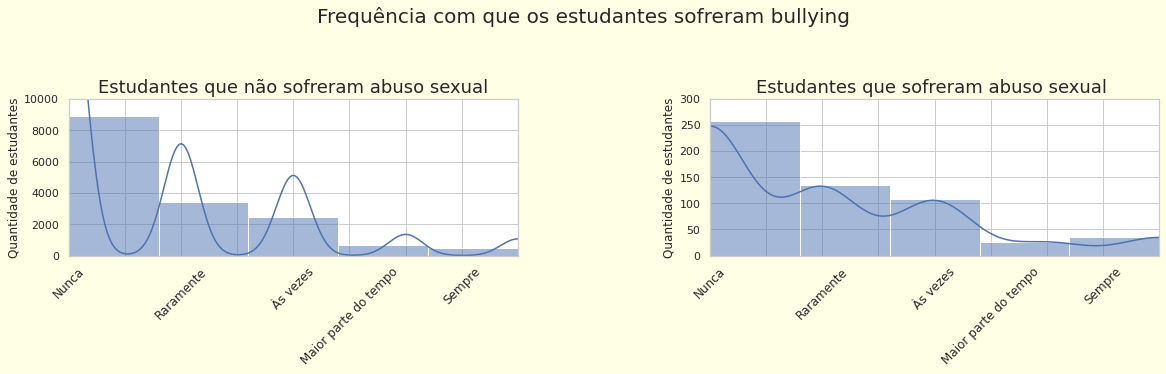

In [157]:
# Criando os datasets que serão plotados
to_plot_noabused = no_sex_abuse_students.query("VB07007 != 99")
to_plot_abused = students_data.query("VB07007 != 99")

#lists '
dictList =['Nunca',
           ' ',
          'Raramente',
           ' ',
          'Às vezes',
          'Maior parte do tempo',
           ' ',
          'Sempre'] 

# Plotanto os gráficos
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.suptitle('Frequência com que os estudantes sofreram bullying',fontsize=20, y=1)

ax1 = sns.histplot(data = to_plot_noabused, 
                   x='VB07007', 
                   bins=5,  
                   kde=True)

ax1.figure.set_size_inches(18, 6)
ax1.set_title('Estudantes que não sofreram abuso sexual', fontsize=18)

# Nomeando os eixos para estudantes não abusados sexualmente 
ax1.set_xlabel('')
ax1.set_ylabel('Quantidade de estudantes')
ax1.grid(which='both', linestyle='-')

ax1.figure.set_facecolor('#ffffe6')

ax1.axes.set_ylim(0,10000)

ax1.set_xticklabels(dictList, rotation='45', fontsize=12)

plt.xlim(1,5)
plt.tight_layout(pad=6, h_pad=4, w_pad=16)

# Segundo gráfico - para estudantes abusados sexualmente
plt.subplot(1,2,2)
ax2 = sns.histplot(data = to_plot_abused, 
                   x='VB07007', 
                   bins=5,  
                   kde=True)

ax2.figure.set_size_inches(18, 6)
ax2.set_title('Estudantes que sofreram abuso sexual ', fontsize=18)

# Nomeando os eixos para estudantes não abusados sexualmente 
ax2.set_xlabel('')
ax2.set_ylabel('Quantidade de estudantes')

ax2.grid(which='both', linestyle='-')

ax2.axes.set_ylim(0,300)
ax2.set_xticklabels(dictList, rotation='45', fontsize=12)

plt.xlim(1,5)

plt.show()

**Em termos proporcionais, a amostra de estudantes que sofreu abuso sexual tem uma margem ligeiramente maior, em todos os níveis de frequência, que a amostra que não sofreu abuso sexual.**

#### Os estudantes, que sofreram abuso sexual, acharam a pesquisa mais constrangedora que a amostra que não sofreu este abuso?

In [158]:
# Criando tabela de frequencia para estudantes não abusados para a pergunta 
# VB16001A08 - Você achou este questionário constrangedor?

answers = dictionary_by_id['VB16001A08']['Respostas']
no_abused_frequency_dist_opinion  = frequency_table(no_sex_abuse_students, 'VB16001A08', 'Você achou este questionário constrangedor?', answers )

# Criando tabela de frequencia para estudantes abusados para a pergunta  - 
# VB16001A08 - Você achou este questionário constrangedor?

answers = dictionary_by_id['VB16001A08']['Respostas']
abused_frequency_dist_opinion  = frequency_table(students_data, 'VB16001A08', 'Você achou este questionário constrangedor?', answers )

In [159]:
table_to_plot = styled_table(no_abused_frequency_dist_opinion, abused_frequency_dist_opinion)
HTML(table_to_plot)

Você achou este questionário constrangedor?,Frequency,Rate
Não,15742,98.47
Sim,167,1.04
Não informado,78,0.49
Você achou este questionário constrangedor?,Frequency,Rate
Não,543,95.43
Sim,22,3.87
Não informado,4,0.70


Plotando um gráfico e desconsiderando a resposta **"Não informado"**  para realizar a comparação de amostra de estudantes que sofreram abuso sexual.

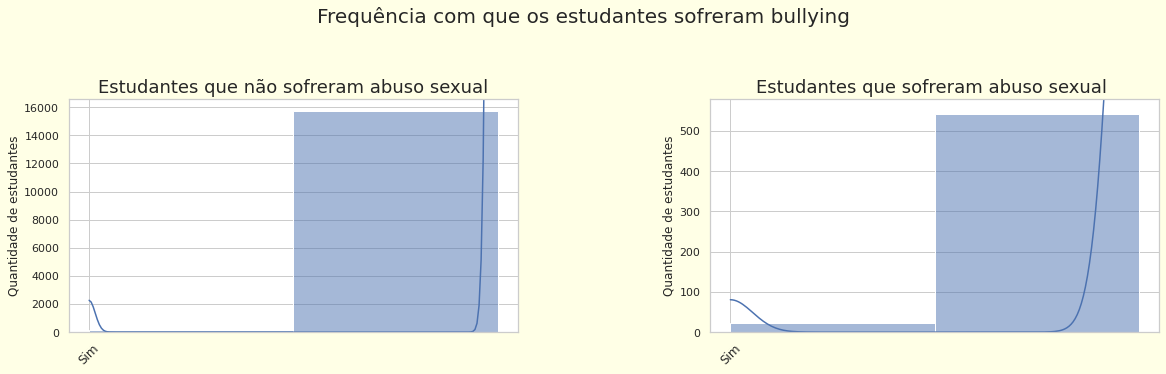

In [160]:
# Criando os datasets que serão plotados
to_plot_noabused = no_sex_abuse_students.query("VB16001A08 != 99")
to_plot_abused = students_data.query("VB16001A08 != 99")

#lists '
dictList =['Sim',
           'Não'] 

# Plotanto os gráficos
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.suptitle('Frequência com que os estudantes sofreram bullying',fontsize=20, y=1)

ax1 = sns.histplot(data = to_plot_noabused, 
                   x='VB16001A08', 
                   bins=2,  
                   kde=True)

ax1.figure.set_size_inches(18, 6)
ax1.set_title('Estudantes que não sofreram abuso sexual', fontsize=18)

# Nomeando os eixos para estudantes não abusados sexualmente 
ax1.set_xlabel('')
ax1.set_ylabel('Quantidade de estudantes')
ax1.grid(which='both', linestyle='-')

ax1.figure.set_facecolor('#ffffe6')

ax1.axes.set_ylim(0,16600)

ax1.set_xticklabels(dictList, rotation='45', fontsize=12)

# Ajustanto dos limites
xint = range(1, 2)
plt.xticks(xint)
plt.tight_layout(pad=6, h_pad=4, w_pad=16)

# Segundo gráfico - para estudantes abusados sexualmente
plt.subplot(1,2,2)
ax2 = sns.histplot(data = to_plot_abused, 
                   x='VB16001A08', 
                   bins=2,  
                   kde=True)

ax2.figure.set_size_inches(18, 6)
ax2.set_title('Estudantes que sofreram abuso sexual ', fontsize=18)

# Nomeando os eixos para estudantes não abusados sexualmente 
ax2.set_xlabel('')
ax2.set_ylabel('Quantidade de estudantes')

ax2.grid(which='both', linestyle='-')

ax2.axes.set_ylim(0,580)

# Ajustanto dos limites

plt.xticks(xint)
ax2.set_xticklabels(dictList, rotation='45', fontsize=12)


plt.show()

**Estudantes que sofreram abuso sexual apresentam um leve aumento na frequência em que consideraram a pesquisa constrangedora em comparação aos indivíduos que não sofreram abuso.**

#### É possível afirmar que o maior número de casos de abuso sexual ocorre dentro da própria família?

In [161]:
# Criando um Dataframe para verificar se algum abusador considerado Múltiplos
# é familiar
Multiple_abusers_family = pd.DataFrame(students_data.query('Abusador == "Múltiplos" & (VB0901703 ==1 | VB0901704 == 1)').groupby('Idade')['REGEOGR'].count().reset_index())
Multiple_abusers_family['Abusador'] = 'Familia'
Multiple_abusers_family.rename(columns={'REGEOGR': 'Quantidade'}, inplace=True)

# Trocando a posição das colunas para deixá-las igual ao dataframe que será feito o append
cols = list(Multiple_abusers_family.columns)
a, b = cols.index('Quantidade'), cols.index('Abusador')
cols[b], cols[a] = cols[a], cols[b]
Multiple_abusers_family = Multiple_abusers_family[cols]


In [162]:
# Criando um dataframe com um agrupador com a somatória dos Abusadores 
# Familiar(es) e Pais/Masdrasta/Padrasto
dfFamily_Abusers = sexual_assault_quantities.query('Abusador == "Familiar(es)" | Abusador == "Pais/Masdrasta/Padrasto"').groupby('Idade').sum().reset_index()
# Criando o identificador de Abusador como família
dfFamily_Abusers['Abusador'] = 'Familia'

In [163]:
# Trocando a posição das colunas para deixá-las igual ao dataframe que será feito o append
cols = list(dfFamily_Abusers.columns)
a, b = cols.index('Quantidade'), cols.index('Abusador')
cols[b], cols[a] = cols[a], cols[b]
dfFamily_Abusers = dfFamily_Abusers[cols]

In [164]:
# Fazendo o Append no Dataframe orignal dos 2 dataframes criados
sexual_assault_quantities= sexual_assault_quantities.append(dfFamily_Abusers, ignore_index = True)
sexual_assault_quantities= sexual_assault_quantities.append(Multiple_abusers_family, ignore_index = True)

In [165]:
sexual_assault_quantities['Abusador'].unique()

array(['Amigo(a)', 'Desconhecido(a)', 'Familiar(es)', 'Múltiplos',
       'Namorado(a)', 'Não informado', 'Outros',
       'Pais/Masdrasta/Padrasto', 'Familia'], dtype=object)

In [166]:
# Plotando o Gráfico
# Dicionário de Cores para os Tipos de Abusadores
colors = {
    'Amigo(a)': 'lightslategray',
    'Desconhecido(a)': 'lightslategray',	
    'Familiar(es)': 'lightslategray',
    'Múltiplos': 'lightslategray',
    'Namorado(a)': 'lightslategray',
    'Pais/Masdrasta/Padrasto': 'lightslategray',
    'Não informado': 'lightslategray',
    'Outros': 'lightslategray',
    'Familia': 'crimson'
}
fig = px.bar(sexual_assault_quantities,x="Abusador", y="Quantidade", 
             labels={"state": "Agressor"},
             template="simple_white", hover_name="Abusador", hover_data=["Idade", "Quantidade"], color='Abusador',
             color_discrete_map =colors)
fig.update_layout(
    xaxis_title_text = 'Grupos de Abusadores Sexuais',
    template = 'plotly_white',
    title = { 'text': 'Maiores agressores sexuais por quantidade de vítimas', 'xanchor': 'center',
          'yanchor': 'top', 'y': 0.95, 'x': 0.45, 'font': dict(size=20)
           },
    showlegend=False,
    yaxis = { 'title': 'Quantidade de Estudantes vítima de abuso', 'categoryorder': 'total descending'},
    xaxis={'categoryorder':'total ascending'},
    autosize = False,
    width = 1000,
    height = 600)

fig.update_yaxes( 
    showgrid=True
)

fig.update_layout( # customize font and legend orientation & position
    font_family="Rockwell",
    legend=dict(
        title=None, orientation="h", y=1, yanchor="bottom", x=0.5, xanchor="center"
    )
)

fig.add_annotation( 
    text=('Valores somados das colunas <br>Pais/Madrasta/Padrasto e Familiar(es)'), x="Familia", y=160,
    arrowhead=1, showarrow=True, arrowsize=2, 
    arrowcolor='red',
    font=dict(
            family="Sans-serif, monospace",
            size=12
            )
)

fig.show()

**Para a amostra analisada o maior número de abusos sexuais é cometido por Namorado(a) e em segunda posição dentro da própria família.**

# Nivelando os dados para a apresentação da comparação entre as pesquisas UNA - 2015 e PeNSE 2015

In [167]:
# Criando um Dataframe para a pesquisa UNA - 2015
# Dados buscados na pesquisa, o endereço se encontra na índice de nome 
# Referência Bibliográfica
conclusionUNA = {'População Total da Pesquisa UNA 2015': [661]
              , 'Total de indivíduos do Sexo Masculino': '318 (48.1%)'
              , 'Total de indivíduos do Sexo Femino': '343 (51.9%)'
              , 'Quantidade de indivíduos que sofreram abuso': '174'
              , 'Percentual do Total que sofreram abuso': '26.3%'
              , 'Faixa de etária com Maior Incidência do abuso': '10-15 anos'
              , 'Percentual da faixa etária (em relação ao total de abusados) com maior incidência de abuso': '45.1%,'
              , 'Quantidade da faixa etária (em relação ao total de abusados) com maior incidência de abuso': '83'
              , 'Classe do abusador sexual mais frequente': 'Familiar ou Próximo da Família '
              , 'Quantidade e Percentual abusador sexual mais frequente': '71.8% (125)'}
conclusionUNA = pd.DataFrame(data=conclusionUNA)

In [168]:
# Consolidando as informações da Pesquisa Pense 2015

# Separando as Amostras
PeNSE_population_sex_abuse = students_data.count()[1]
PeNSE_total_population = data.count()[1]

# Amostras por gênero
PeNSE_Men = data.query('Genero == "Masculino"').count()[1]
PeNSE_Women = data.query('Genero == "Feminino"').count()[1]
Percentage_PeNSE_Men = round((PeNSE_Men / PeNSE_total_population)*100,1)
Percentage_PeNSE_Women = round((PeNSE_Women / PeNSE_total_population)*100,1)

# % da População que sofreu abuso seuxal
PeNSE_percentage_total = round((PeNSE_population_sex_abuse/PeNSE_total_population)*100,1)

# Faixa com Maior Abuso
PeNSE_Qtde_major_frequency = students_data[students_data['Idade'].between(13, 16)].count()[1]

# Percentual da População com Maior Abuso
PeNSE_total_ratio_major_frequency = round((PeNSE_Qtde_major_frequency/PeNSE_population_sex_abuse)*100,1)

# Buscando a quantidade de pessoas próximas que são abusadores
PeNSE_major_abuser_quantity = sexual_assault_quantities.query( 
                             'Abusador == "Familiar(es)" | \
                              Abusador == "Pais/Masdrasta/Padrasto" | \
                              Abusador == "Namorado(a)" | \
                              Abusador == "Amigo(a)" | \
                              Abusador == "Outros"')['Quantidade'].sum()

# Calculando o percentual para os maiores abusadores                            
PeNSE_major_abuser_quantity_ratio = round((PeNSE_major_abuser_quantity / PeNSE_population_sex_abuse)*100,1)                            

In [169]:
# Criando um dataframe com os dados da conclusão para a pesquisa PeNSE 2015
conclusionPeNSE = {
                'População Total da Pesquisa PeNSE 2015': [PeNSE_total_population]
              , 'Total de indivíduos do Sexo Masculino':  f'{PeNSE_Men} ({Percentage_PeNSE_Men}%)' 
              , 'Total de indivíduos do Sexo Feminino': f'{PeNSE_Women} ({Percentage_PeNSE_Women}%)' 
              , 'Quantidade de indivíduos que sofreram abuso': f'{PeNSE_population_sex_abuse}'
              , 'Percentual do Total que sofreram abuso': f'{PeNSE_percentage_total}%'
              , 'Faixa de etária com Maior Incidência do abuso': '13-16 anos'
              , 'Percentual (em relação ao total de abusados) da faixa etária com maior incidência de abuso': f'{PeNSE_major_abuser_quantity_ratio}%'
              , 'Quantidade (em relação ao total de abusados) da faixa etária com maior incidência de abuso': PeNSE_Qtde_major_frequency
              , 'Classe do abusador sexual mais frequente': 'Familiar ou Próximo da Família '
              , 'Quantidade e Percentual abusador sexual mais frequente': f'{PeNSE_major_abuser_quantity_ratio}% ({PeNSE_major_abuser_quantity})'}
conclusionPeNSE = pd.DataFrame(data=conclusionPeNSE)

# Comparando os dados das pesquisas **UNA - 2015 e PeNSE 2015**

In [170]:
# Plotando a Conclusão
table_to_plot = styled_table_PeNSE(conclusionPeNSE.T, conclusionUNA.T)
HTML(table_to_plot)

,
População Total da Pesquisa PeNSE 2015,16556
Total de indivíduos do Sexo Masculino,8287 (50.1%)
Total de indivíduos do Sexo Feminino,8269 (49.9%)
Quantidade de indivíduos que sofreram abuso,569
Percentual do Total que sofreram abuso,3.4%
Faixa de etária com Maior Incidência do abuso,13-16 anos
Percentual (em relação ao total de abusados) da faixa etária com maior incidência de abuso,80.8%
Quantidade (em relação ao total de abusados) da faixa etária com maior incidência de abuso,428
Classe do abusador sexual mais frequente,Familiar ou Próximo da Família
Quantidade e Percentual abusador sexual mais frequente,80.8% (460)


Apesar do volume de dados da pesquisa **PeNSE - 2015** ser superior a pesquisa **UNA - 2015** podemos perceber algumas semelhanças entre elas:

* Homogeneidade dos gêneros é muito próxima entre as pesquisas

 * UNA - 2015 
    * Total de indivíduos do sexo masculino	318 (48.1%)
    * Total de indivíduos do sexo femino	343 (51.9%)

 * PeNSE - 2015
    * Total de indivíduos do sexo masculino	8287 (50.1%)
    * Total de indivíduos do sexo feminino	8269 (49.9%)

* A faixa etária de maior volume e percentual de abusos sexuais é muito similar em ambas.

 * UNA - 2015 
    * Faixa de etária com maior incidência do abuso	10-15 anos
    * Percentual (em relação ao total de abusados) da faixa etária com maior incidência de abuso	45.1%

 * PeNSE - 2015
    * Faixa de etária com maior incidência do abuso	13-16 anos
    * Percentual (em relação ao total de abusados) da faixa etária com maior incidência de abuso	44.6%

* A classe de abusador de maior incidência é a mesma **"Familiar ou Próximo da Família"**

# Conclusão



Infelizmente os abusos sexuais, além da dor psicológica provocada pelo ato, também geram consequências na vida dos estudantes. Com a amostra populacional que analisei, pude verificar que as vítimas consomem mais cedo e mais continuamente alcóol e drogas. Os indivíduos do sexo feminino são as maiores vítimas e a cor/raça também indicam um maior volume de casos para a cor/raça parda e o abuso é geralmente efetuado por membro ou pessoa próxima da família.

Portanto, campanhas de conscientização sobre o problema, educação sexual nas escolas e amparo do poder público se fazem necessários e, de forma acessível, para revertermos este quadro que nos causa repúdio e vergonha.